In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import time
from tqdm import tqdm
import gsd.hoomd  

from matplotlib import cm
from matplotlib.colors import Normalize


In [2]:
import sys
import os

# Absolute path to your module's directory
module_path = os.path.abspath('/localscratch/zippoema/git/HPA/src/')
if module_path not in sys.path:
    sys.path.insert(0, module_path)

import hpa.rates as hpar  # Now this should work

In [3]:
plt.style.use('default')
plt.style.use('/localscratch/zippoema/md_plots/rates_plot.mplstyle')

In [4]:
path_CAL = '/localscratch/zippoema/zippo_phd_data_bckp/project_hps_phospho_tdp43_natcomm_bckp/single-tdp43/data_CALVADOS3/'
path_new = '/media/zippoema/Elements/zippo_phd_data/new_data/'
path_200 = '/localscratch/zippoema/project_ness/simulations/200-tdp43_CAL3/'
path_pfull = '/localscratch/zippoema/working_dir/phospho-full-ck1d/'


In [13]:
ser_i = np.array([266, 273, 292, 305, 317, 332, 333, 342, 347, 350, 369, 373, 375, 377, 379, 387, 389, 393, 395, 403, 404, 407, 409, 410])-260-1 
ser_i_full = ser_i+121 
ser_i_equi = np.linspace(8, 146, 24, dtype=int)
n_ser = len(ser_i)
ser_i

array([  5,  12,  31,  44,  56,  71,  72,  81,  86,  89, 108, 112, 114,
       116, 118, 126, 128, 132, 134, 142, 143, 146, 148, 149])

## CK1d + TDP-43 LCD

In [9]:
rp, drp = hpar.estimator_rate_single_exponential(dirpath=path_CAL+'sim_sh_network_ck1d/', file_suffix='ck1d_tdp43_CALVADOS3_network_b30_250K_contacts.txt',
                                                  ser_l=ser_i, n_sims=50, max_time=2*10**8)
rp *= 10**8      # units \mu s^-1
drp *= 10**8

rp_f, drp_f = hpar.estimator_rate_single_exponential(dirpath=path_CAL+'sim_sh_network_full_ck1d/', file_suffix='full-ck1d_tdp43_CALVADOS3_network_b30_250K_contacts.txt',
                                                  ser_l=ser_i, n_sims=50, max_time=2*10**8)
rp_f *= 10**8      # units \mu s^-1
drp_f *= 10**8

In [10]:
rc, drc = hpar.count_contacts(dirpath=path_CAL+'sim_np_network_ck1d/', file_suffix='ck1d_tdp43_CALVADOS3_network_np_b30_250K_contacts.txt',
                                                  ser_l=ser_i, n_sims=5)
rc /= 10      # units \mu s^-1
drc/= 10

rc_f, drc_f = hpar.count_contacts(dirpath=path_CAL+'sim_np_network_full_ck1d/', file_suffix='full-ck1d_tdp43_CALVADOS3_network_np_b30_250K_contacts.txt',
                                                  ser_l=ser_i, n_sims=5)
rc_f /= 10      # units \mu s^-1
drc_f /= 10

In [14]:
rp_f_ps328ps331, drp_f_ps328ps331 = hpar.estimator_rate_single_exponential(dirpath=path_pfull+'sim_ph_tdp43-lcd_pS328pS331-full-ck1d-open/', 
                                                                           file_suffix='tdp43-lcd_com-pS328pS331-full-ck1d-open_ph_CAL3_contacts.txt',
                                                                           ser_l=ser_i, n_sims=20, max_time=2*10**8)
rp_f_ps328ps331 *= 10**8       # units \mu s^-1
drp_f_ps328ps331 *= 10**8 

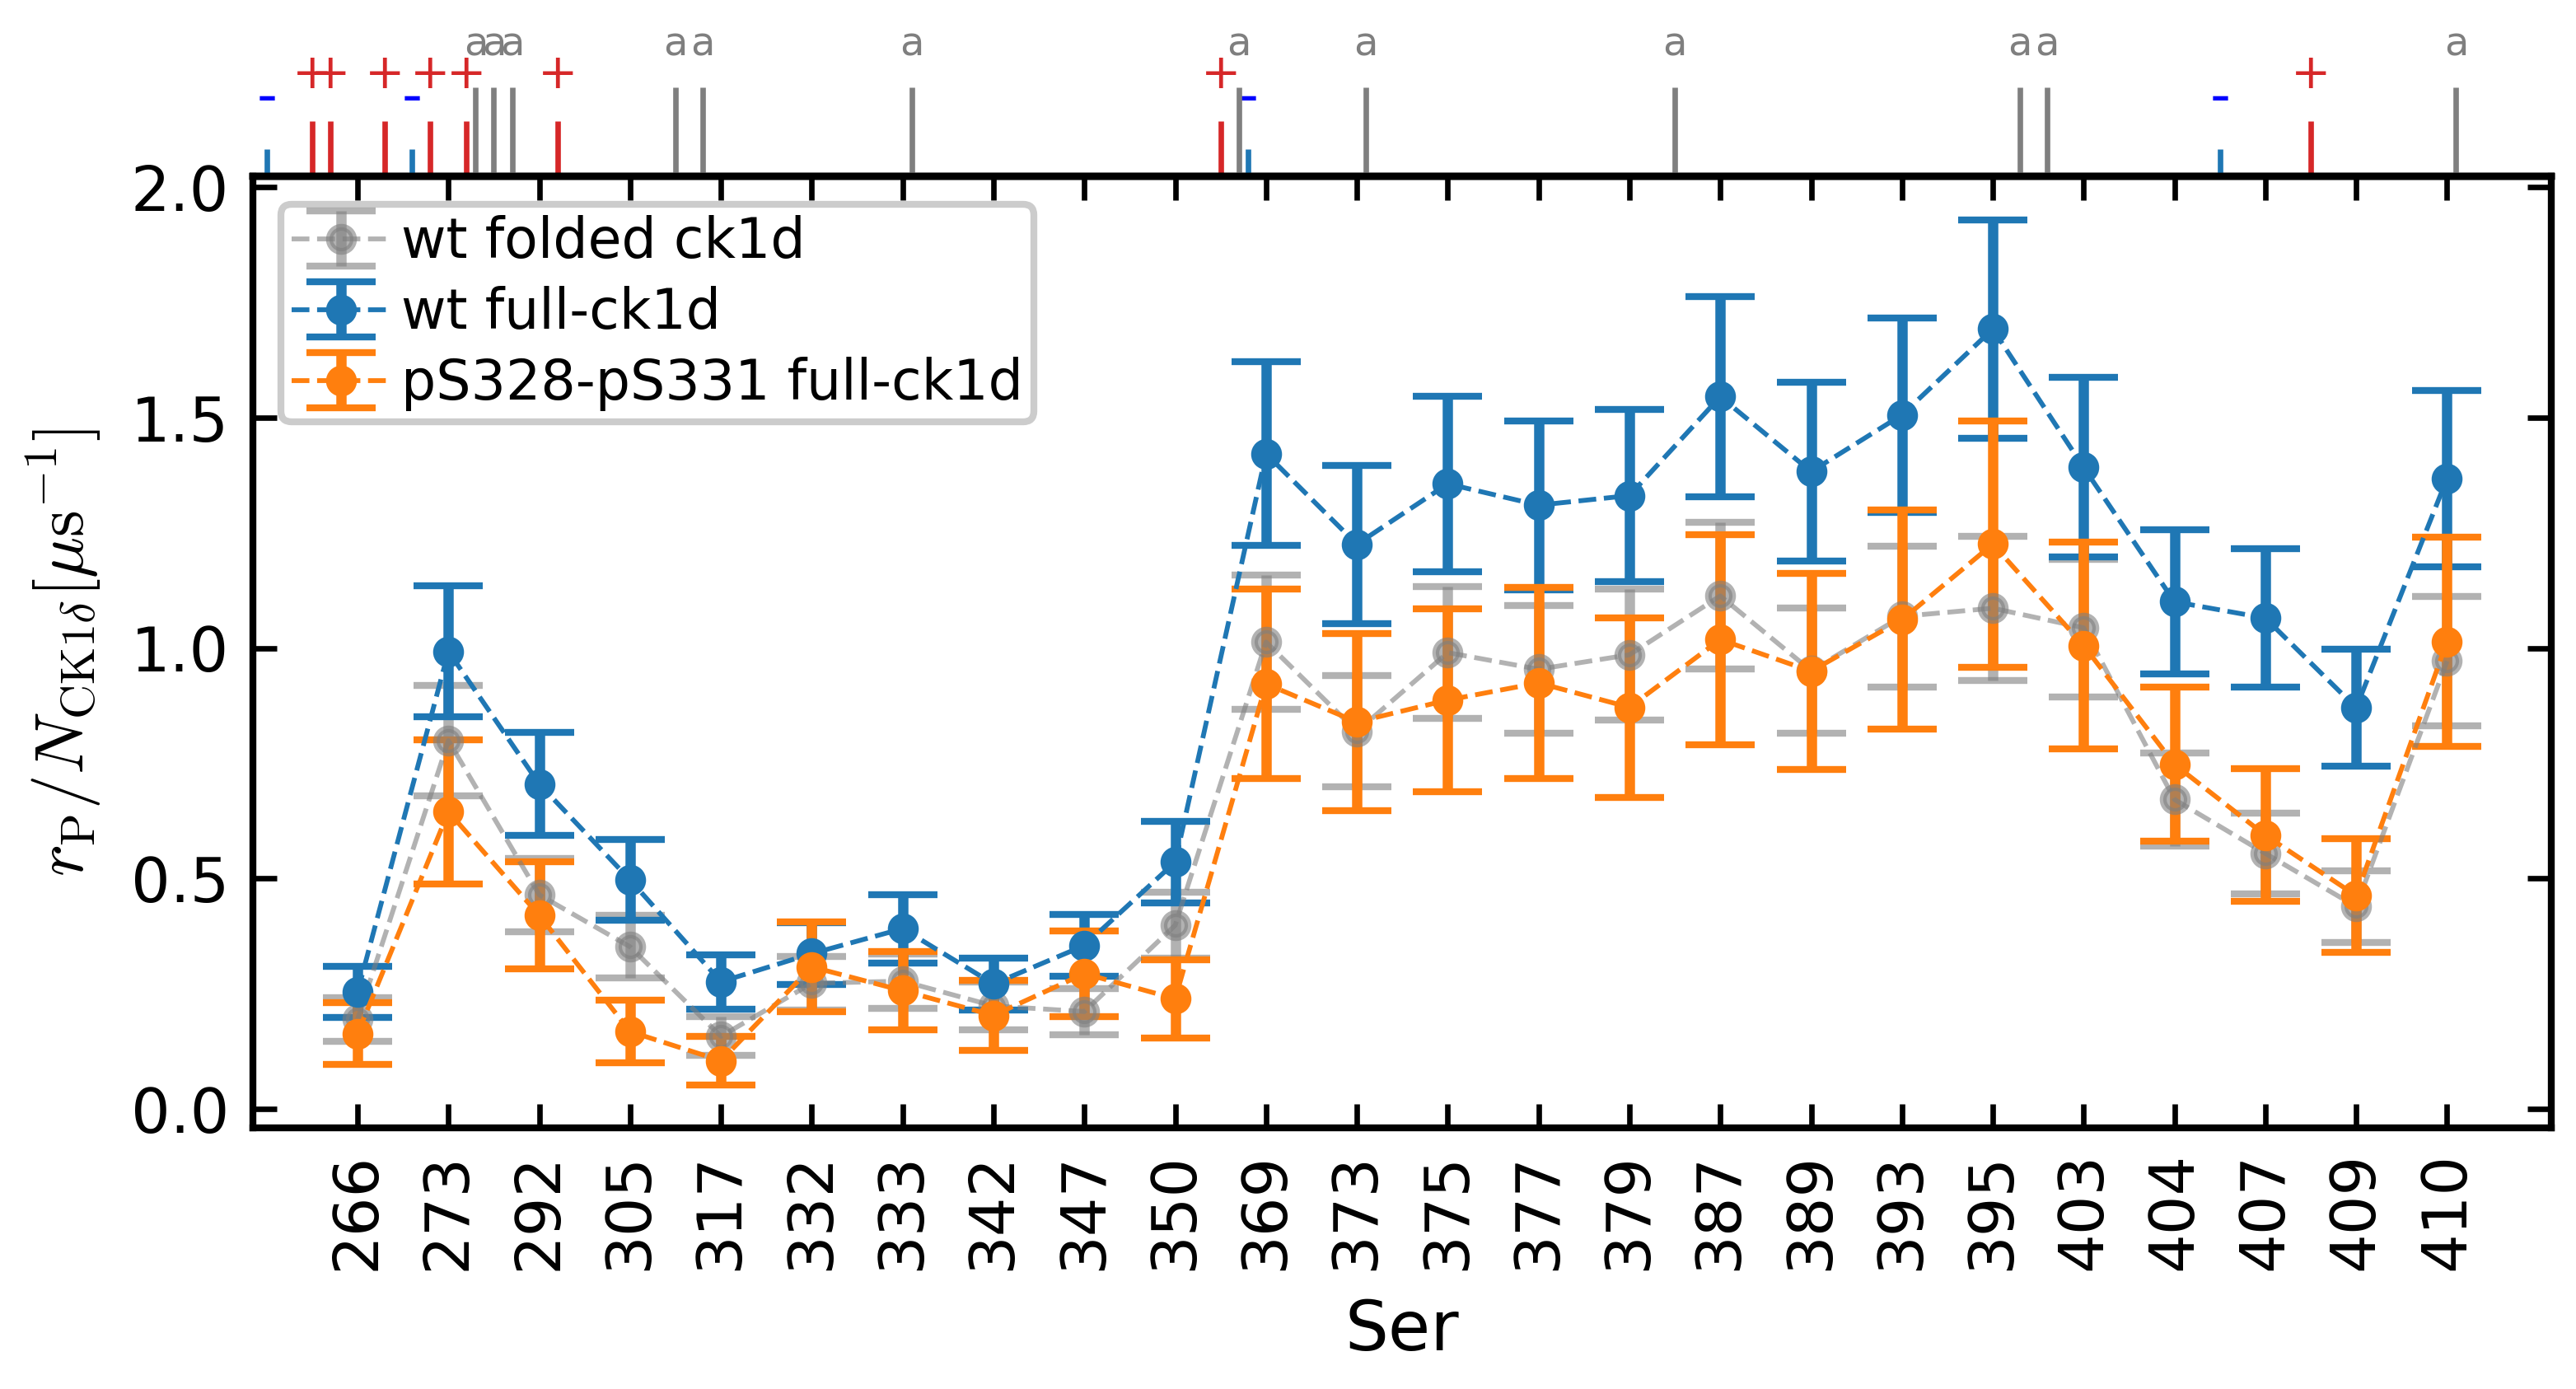

In [40]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rp, drp, fmt='.--', color='tab:grey', alpha=0.6, elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"wt folded ck1d")
ax1.errorbar(np.arange(1,25), rp_f, drp_f, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"wt full-ck1d")
ax1.errorbar(np.arange(1,25), rp_f_ps328ps331, drp_f_ps328ps331, fmt='.--', color='tab:orange', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"pS328-pS331 full-ck1d")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

## CK1d + full TDP-43

In [19]:
rp_ftdp, drp_ftdp = hpar.estimator_rate_single_exponential(dirpath=path_new+'sim_1-full-tdp43_1-ck1d-open/', 
                                                           file_suffix='com-full-tdp43_com-ck1d-open_CAL3_contacts.txt',
                                                            ser_l=ser_i+260, n_sims=10, max_time=2*10**8)
rp_ftdp *= 10**8      # units \mu s^-1
drp_ftdp *= 10**8


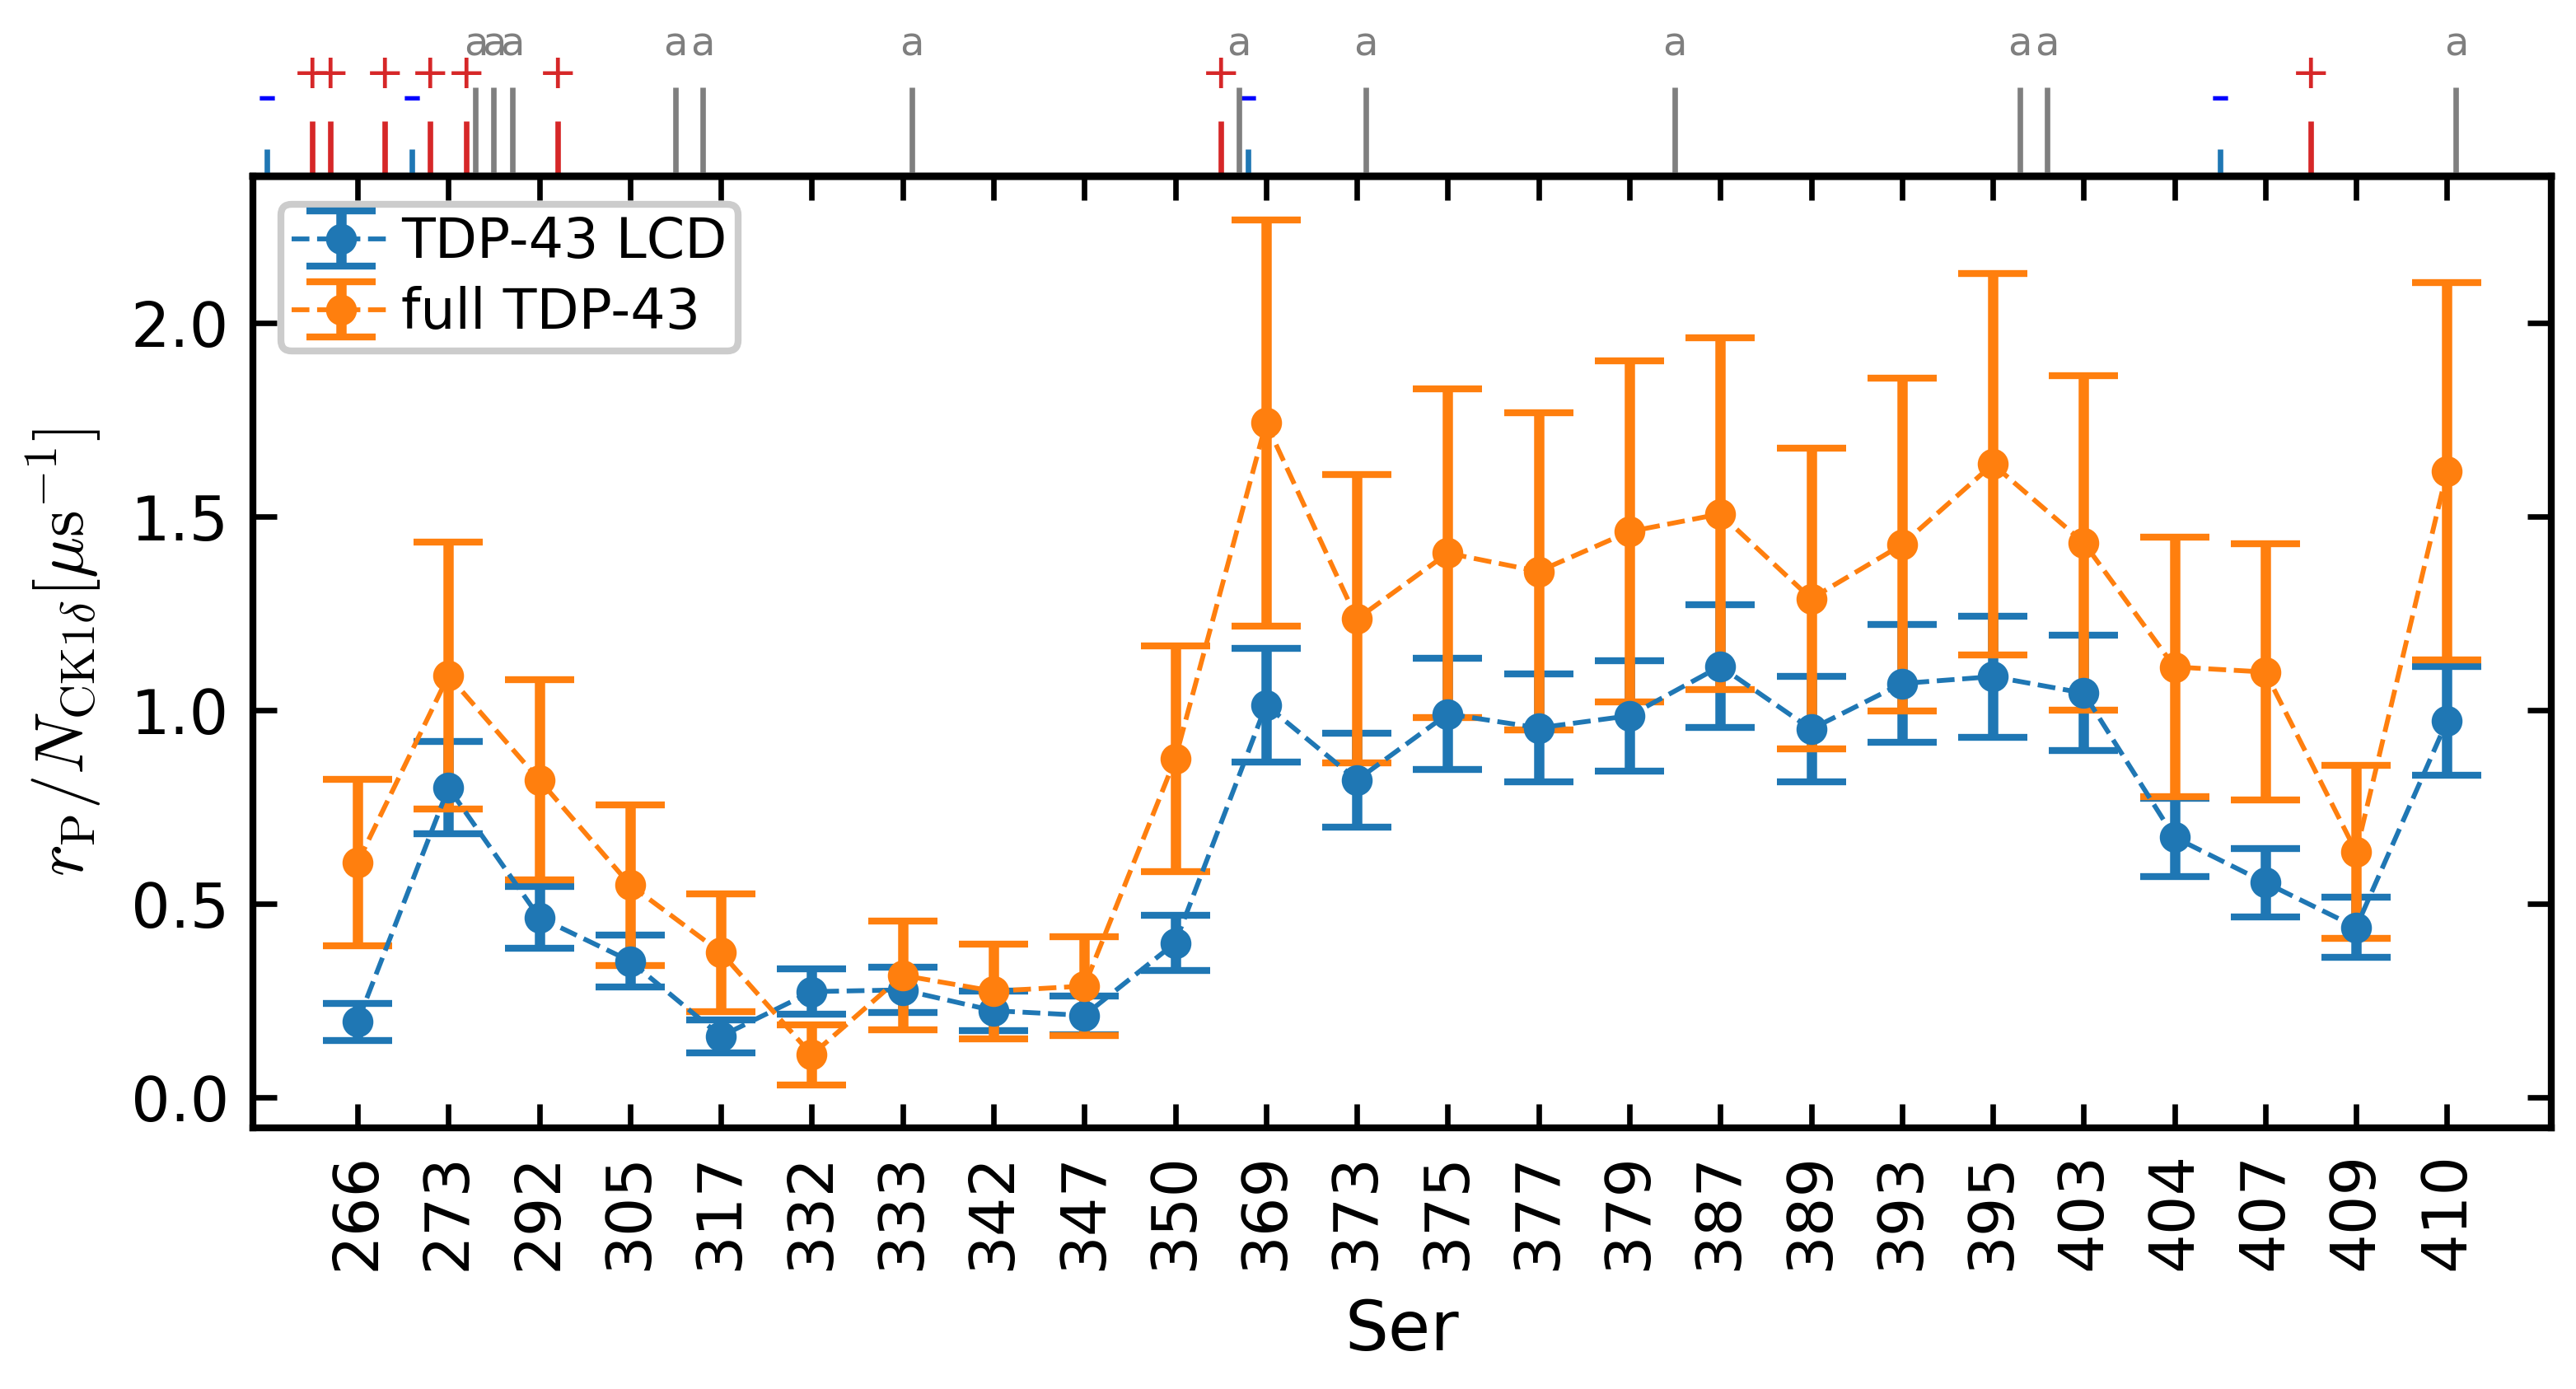

In [23]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rp, drp, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"TDP-43 LCD")
ax1.errorbar(np.arange(1,25), rp_ftdp, drp_ftdp, fmt='.--', color='tab:orange', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"full TDP-43")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

## 2 TDP-43 LCD, 1 CK1d, 1 pp3 

In [12]:
path1 = '/localscratch/zippoema/project_ness/simulations/2-tdp43-lcd_1-ck1d-open_1-pp3/'


In [23]:
(rp_k, drp_k), (rp_p, drp_p) = hpar.count_contacts(dirpath=path1+'sim_ph_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_ph_contacts.txt', 
                                              ser_l=ser_i, n_sims=25, type_of_contact=1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2, start=200000000)

(rdp_k, drdp_k), (rdp_p, drdp_p) = hpar.count_contacts(dirpath=path1+'sim_ph_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_ph_contacts.txt', 
                                              ser_l=ser_i, n_sims=25, type_of_contact=-1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2, start=200000000)

(rc_k, drc_k), (rc_p, drc_p) = hpar.count_contacts(dirpath=path1+'sim_np_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_np_contacts.txt', 
                                              ser_l=ser_i, n_sims=10, type_of_contact=None, len_prot=154, n_prot=2, max_dist=1.05, nenz=2)



In [31]:
(rp_k_dmu5, drp_k_dmu5), (rp_p_dmu5, drp_p_dmu5) = hpar.count_contacts(dirpath=path1+'sim_dmu-5_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-5_0_contacts.txt', 
                                              ser_l=ser_i, n_sims=20, type_of_contact=1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2, start=200000000)

(rdp_k_dmu5, drdp_k_dmu5), (rdp_p_dmu5, drdp_p_dmu5) = hpar.count_contacts(dirpath=path1+'sim_dmu-5_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-5_0_contacts.txt', 
                                              ser_l=ser_i, n_sims=20, type_of_contact=-1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2, start=200000000)

(rp_k_dmu10, drp_k_dmu10), (rp_p_dmu10, drp_p_dmu10) = hpar.count_contacts(dirpath=path1+'sim_dmu-10_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-10_0_contacts.txt', 
                                              ser_l=ser_i, n_sims=20, type_of_contact=1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2, start=200000000)

(rdp_k_dmu10, drdp_k_dmu10), (rdp_p_dmu10, drdp_p_dmu10) = hpar.count_contacts(dirpath=path1+'sim_dmu-10_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-10_0_contacts.txt', 
                                              ser_l=ser_i, n_sims=20, type_of_contact=-1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2, start=200000000)


In [29]:
def pSer_per_chain(dirpath, file_suffix, ser_l, n_sims, times, len_prot=154, n_prot=2):
    
    if isinstance(n_sims, int):
        sims_list = [s for s in range(n_sims)]
    elif isinstance(n_sims, list):
        sims_list = n_sims
    else:
        raise ValueError('n_sims must be int or list of int!')
        
    pSer_per_chain = np.zeros((len(sims_list)*n_prot, len(times)))
    for ns, s in enumerate(sims_list):
        with gsd.hoomd.open(dirpath+f"/sim{s+1}_{file_suffix}", 'rb') as input_gsd:
            for i, tt in enumerate(tqdm(times)):
                frame = input_gsd[int(tt)]
                type_ids = frame.particles.typeid[:len_prot*n_prot]
                pSer_per_chain[ns*n_prot:(ns+1)*n_prot, i] = [ np.sum( type_ids[len_prot*ichain:len_prot*(ichain+1)]==20 ) for ichain in range(n_prot) ]

    return np.mean(pSer_per_chain, axis=0), np.std(pSer_per_chain, axis=0)/np.sqrt(len(sims_list)*n_prot -1)
    

In [31]:
times = np.arange(0,2000,20)
len(times)
times_cond = np.arange(0,2500,20)
len(times_cond)
times_cond_5us = np.arange(0,1000,20)
len(times_cond)

125

In [13]:
pSer, d_pSer = pSer_per_chain(dirpath=path1+'sim_ph_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_ph_dump.gsd', 
                                              ser_l=ser_i, n_sims=25, times=times)

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 85.49it/s]


In [16]:
pSer_dmu0, d_pSer_dmu0 = pSer_per_chain(dirpath=path1+'sim_dmu0_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu0_0_dump.gsd', 
                                              ser_l=ser_i, n_sims=20, times=times)

100%|███████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3506.56it/s]


In [14]:
pSer_dmu5, d_pSer_dmu5 = pSer_per_chain(dirpath=path1+'sim_dmu-5_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-5_0_dump.gsd', 
                                              ser_l=ser_i, n_sims=20, times=times)

100%|███████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3412.56it/s]


In [15]:
pSer_dmu10, d_pSer_dmu10 = pSer_per_chain(dirpath=path1+'sim_dmu-10_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-10_0_dump.gsd', 
                                              ser_l=ser_i, n_sims=20, times=times)

100%|███████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3494.99it/s]


In [21]:
pSer_dmu40, d_pSer_dmu40 = pSer_per_chain(dirpath=path1+'sim_dmu-40_8_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-40_8_dump.gsd', 
                                              ser_l=ser_i, n_sims=20, times=times)

100%|███████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3316.10it/s]


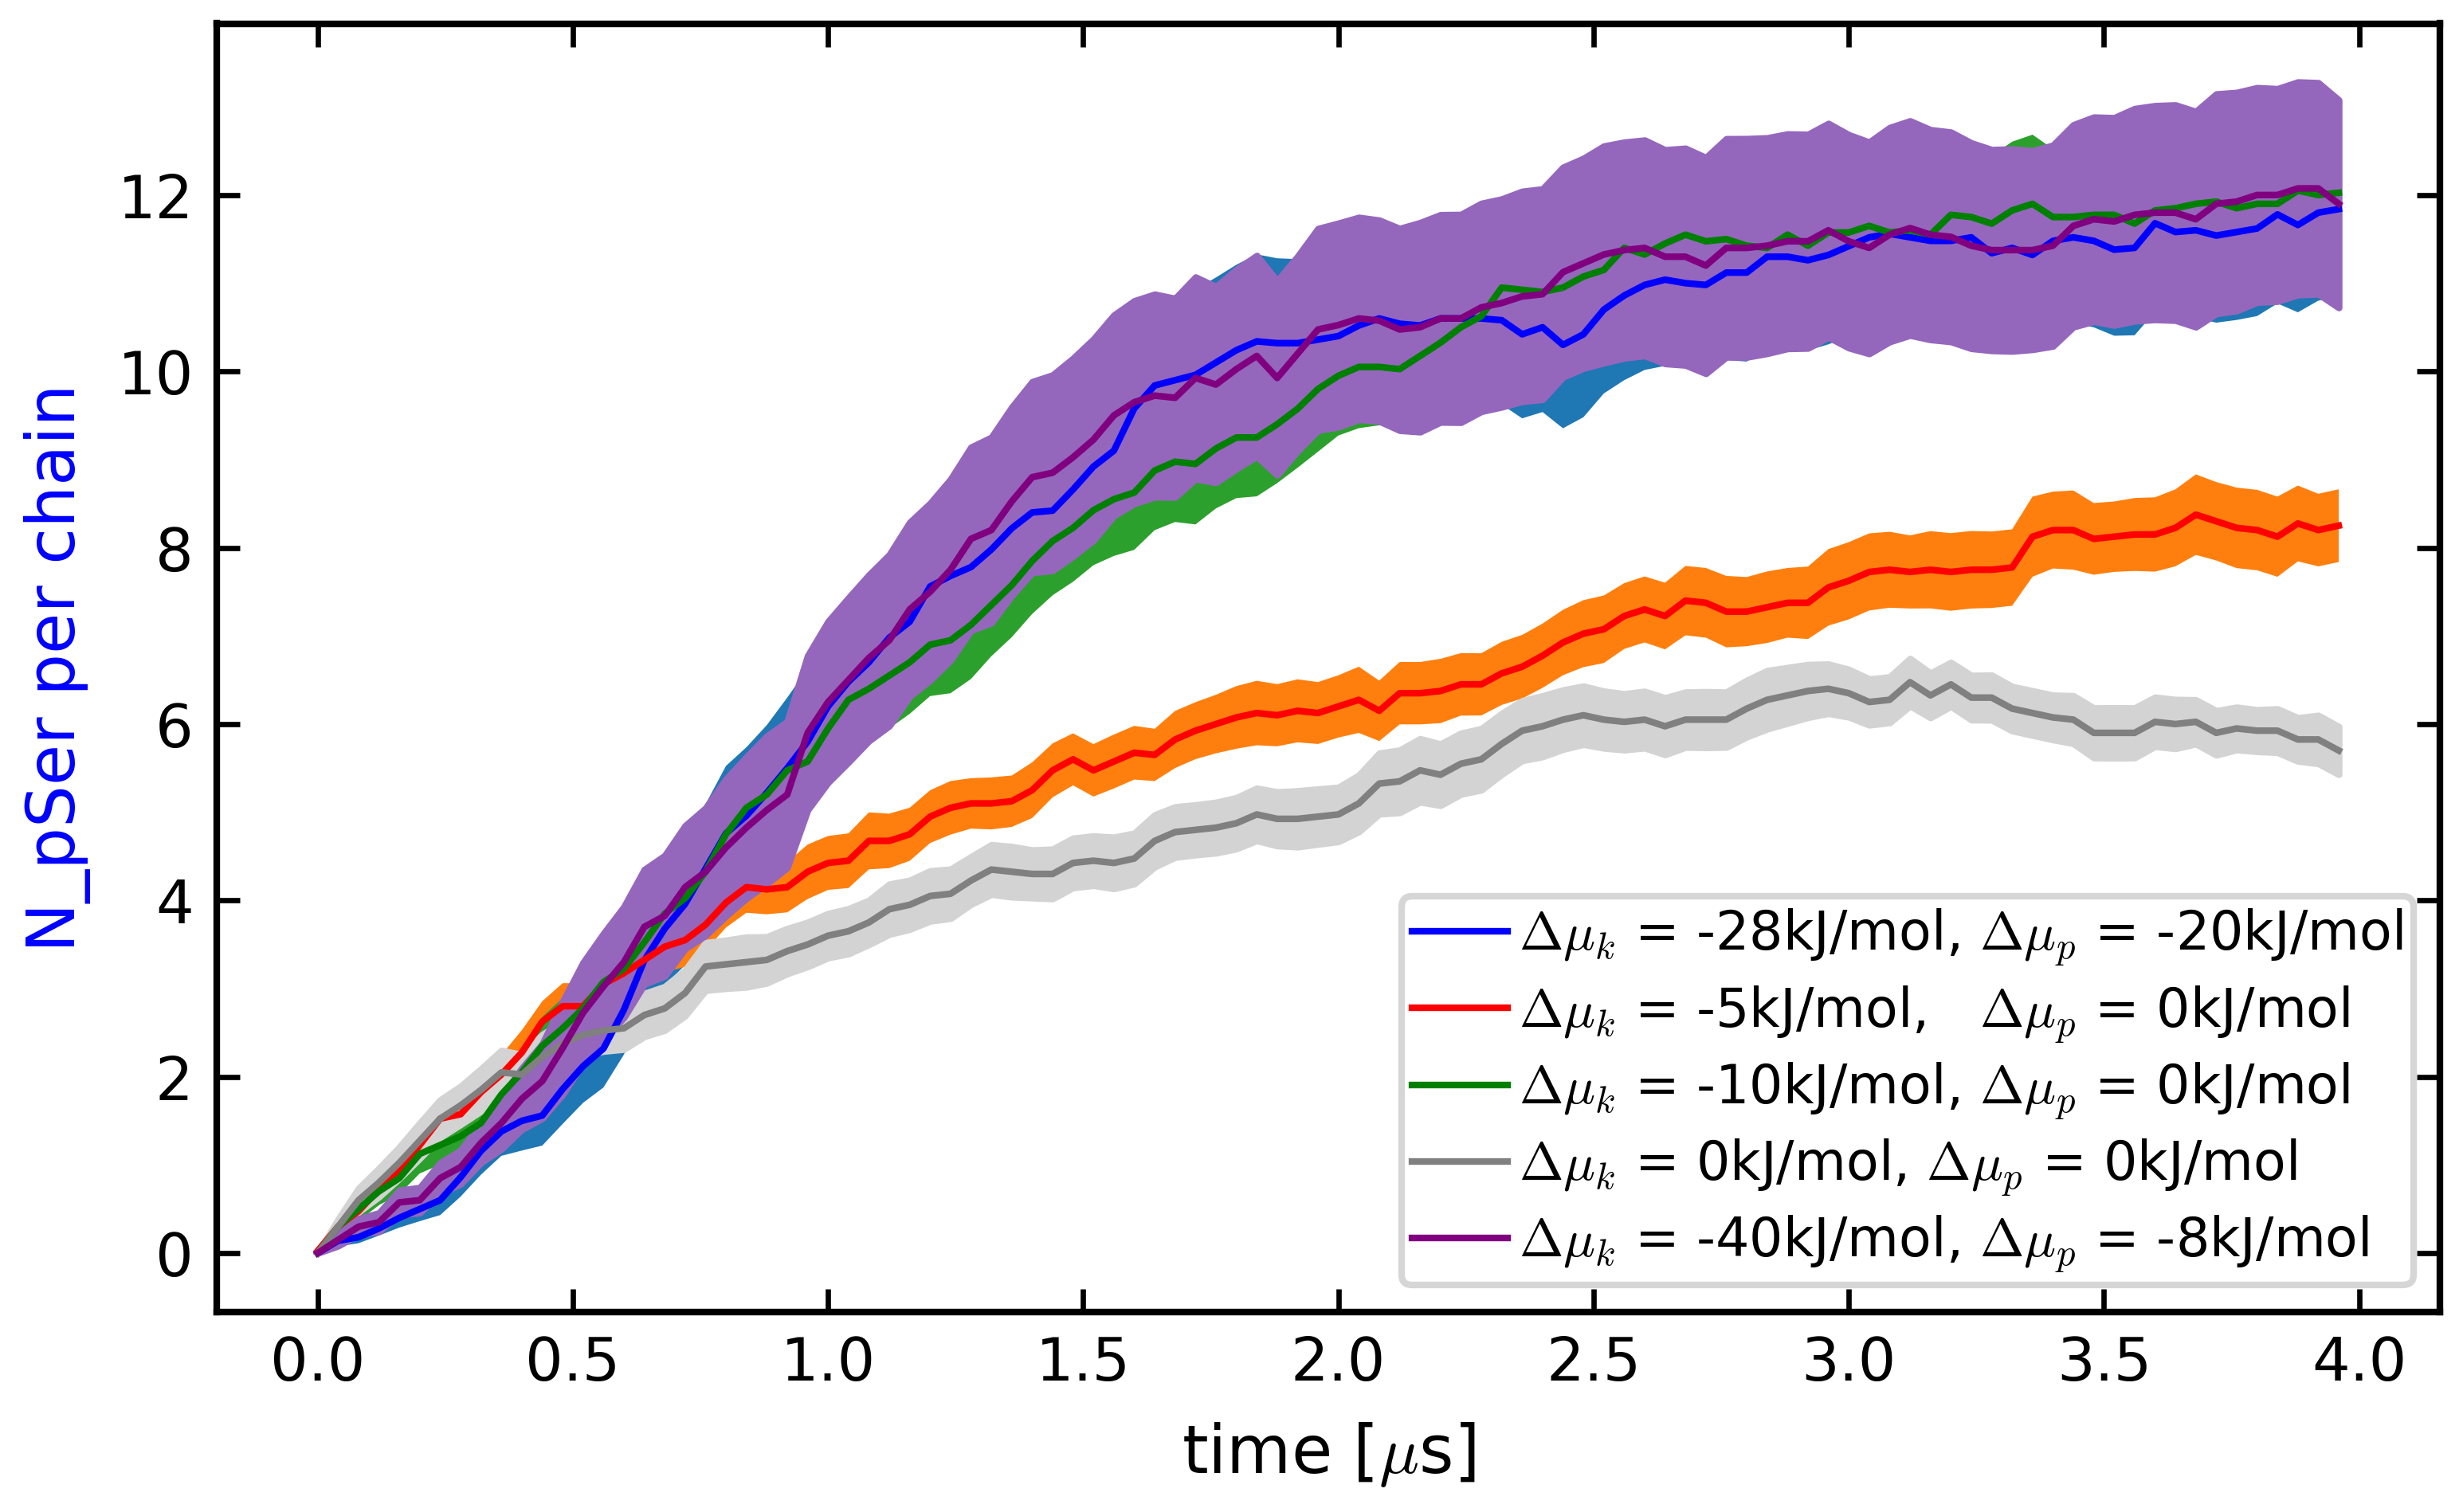

In [24]:
time_step = times*200000/1e8

fig, ax1 = plt.subplots(figsize=(6, 3.5))

# Plot the first array with the primary y-axis
ax1.plot(time_step, pSer, 'b', label=r'$\Delta \mu_k$ = -28kJ/mol, $\Delta \mu_p$ = -20kJ/mol')
ax1.fill_between(time_step, pSer-d_pSer, pSer+d_pSer)
ax1.plot(time_step, pSer_dmu5, 'r', label=r'$\Delta \mu_k$ = -5kJ/mol,   $\Delta \mu_p$ = 0kJ/mol')
ax1.fill_between(time_step, pSer_dmu5-d_pSer_dmu5, pSer_dmu5+d_pSer_dmu5)
ax1.plot(time_step, pSer_dmu10, 'g', label=r'$\Delta \mu_k$ = -10kJ/mol, $\Delta \mu_p$ = 0kJ/mol')
ax1.fill_between(time_step, pSer_dmu10-d_pSer_dmu10, pSer_dmu10+d_pSer_dmu10)
ax1.plot(time_step, pSer_dmu0, color='grey', label=r'$\Delta \mu_k$ = 0kJ/mol, $\Delta \mu_p$ = 0kJ/mol')
ax1.fill_between(time_step, pSer_dmu0-d_pSer_dmu0, pSer_dmu0+d_pSer_dmu0, color='lightgrey')
ax1.plot(time_step, pSer_dmu40, color='purple', label=r'$\Delta \mu_k$ = -40kJ/mol, $\Delta \mu_p$ = -8kJ/mol')
ax1.fill_between(time_step, pSer_dmu40-d_pSer_dmu40, pSer_dmu40+d_pSer_dmu40, color='tab:purple')
#ax1.set_xlabel('time [steps]')
ax1.set_xlabel(r'time [$\mu$s]')
ax1.set_ylabel('N_pSer per chain', color='b')


ax1.legend(ncols=1, loc='lower right')

#filename = '/localscratch/zippoema/project_ness/plots/2-tdp43-lcd_1-ck1d-open_1-pp3/n_pser_in_time'
#plt.savefig(filename+'.png', dpi=600)
#plt.savefig(filename+'.pdf', dpi=600)

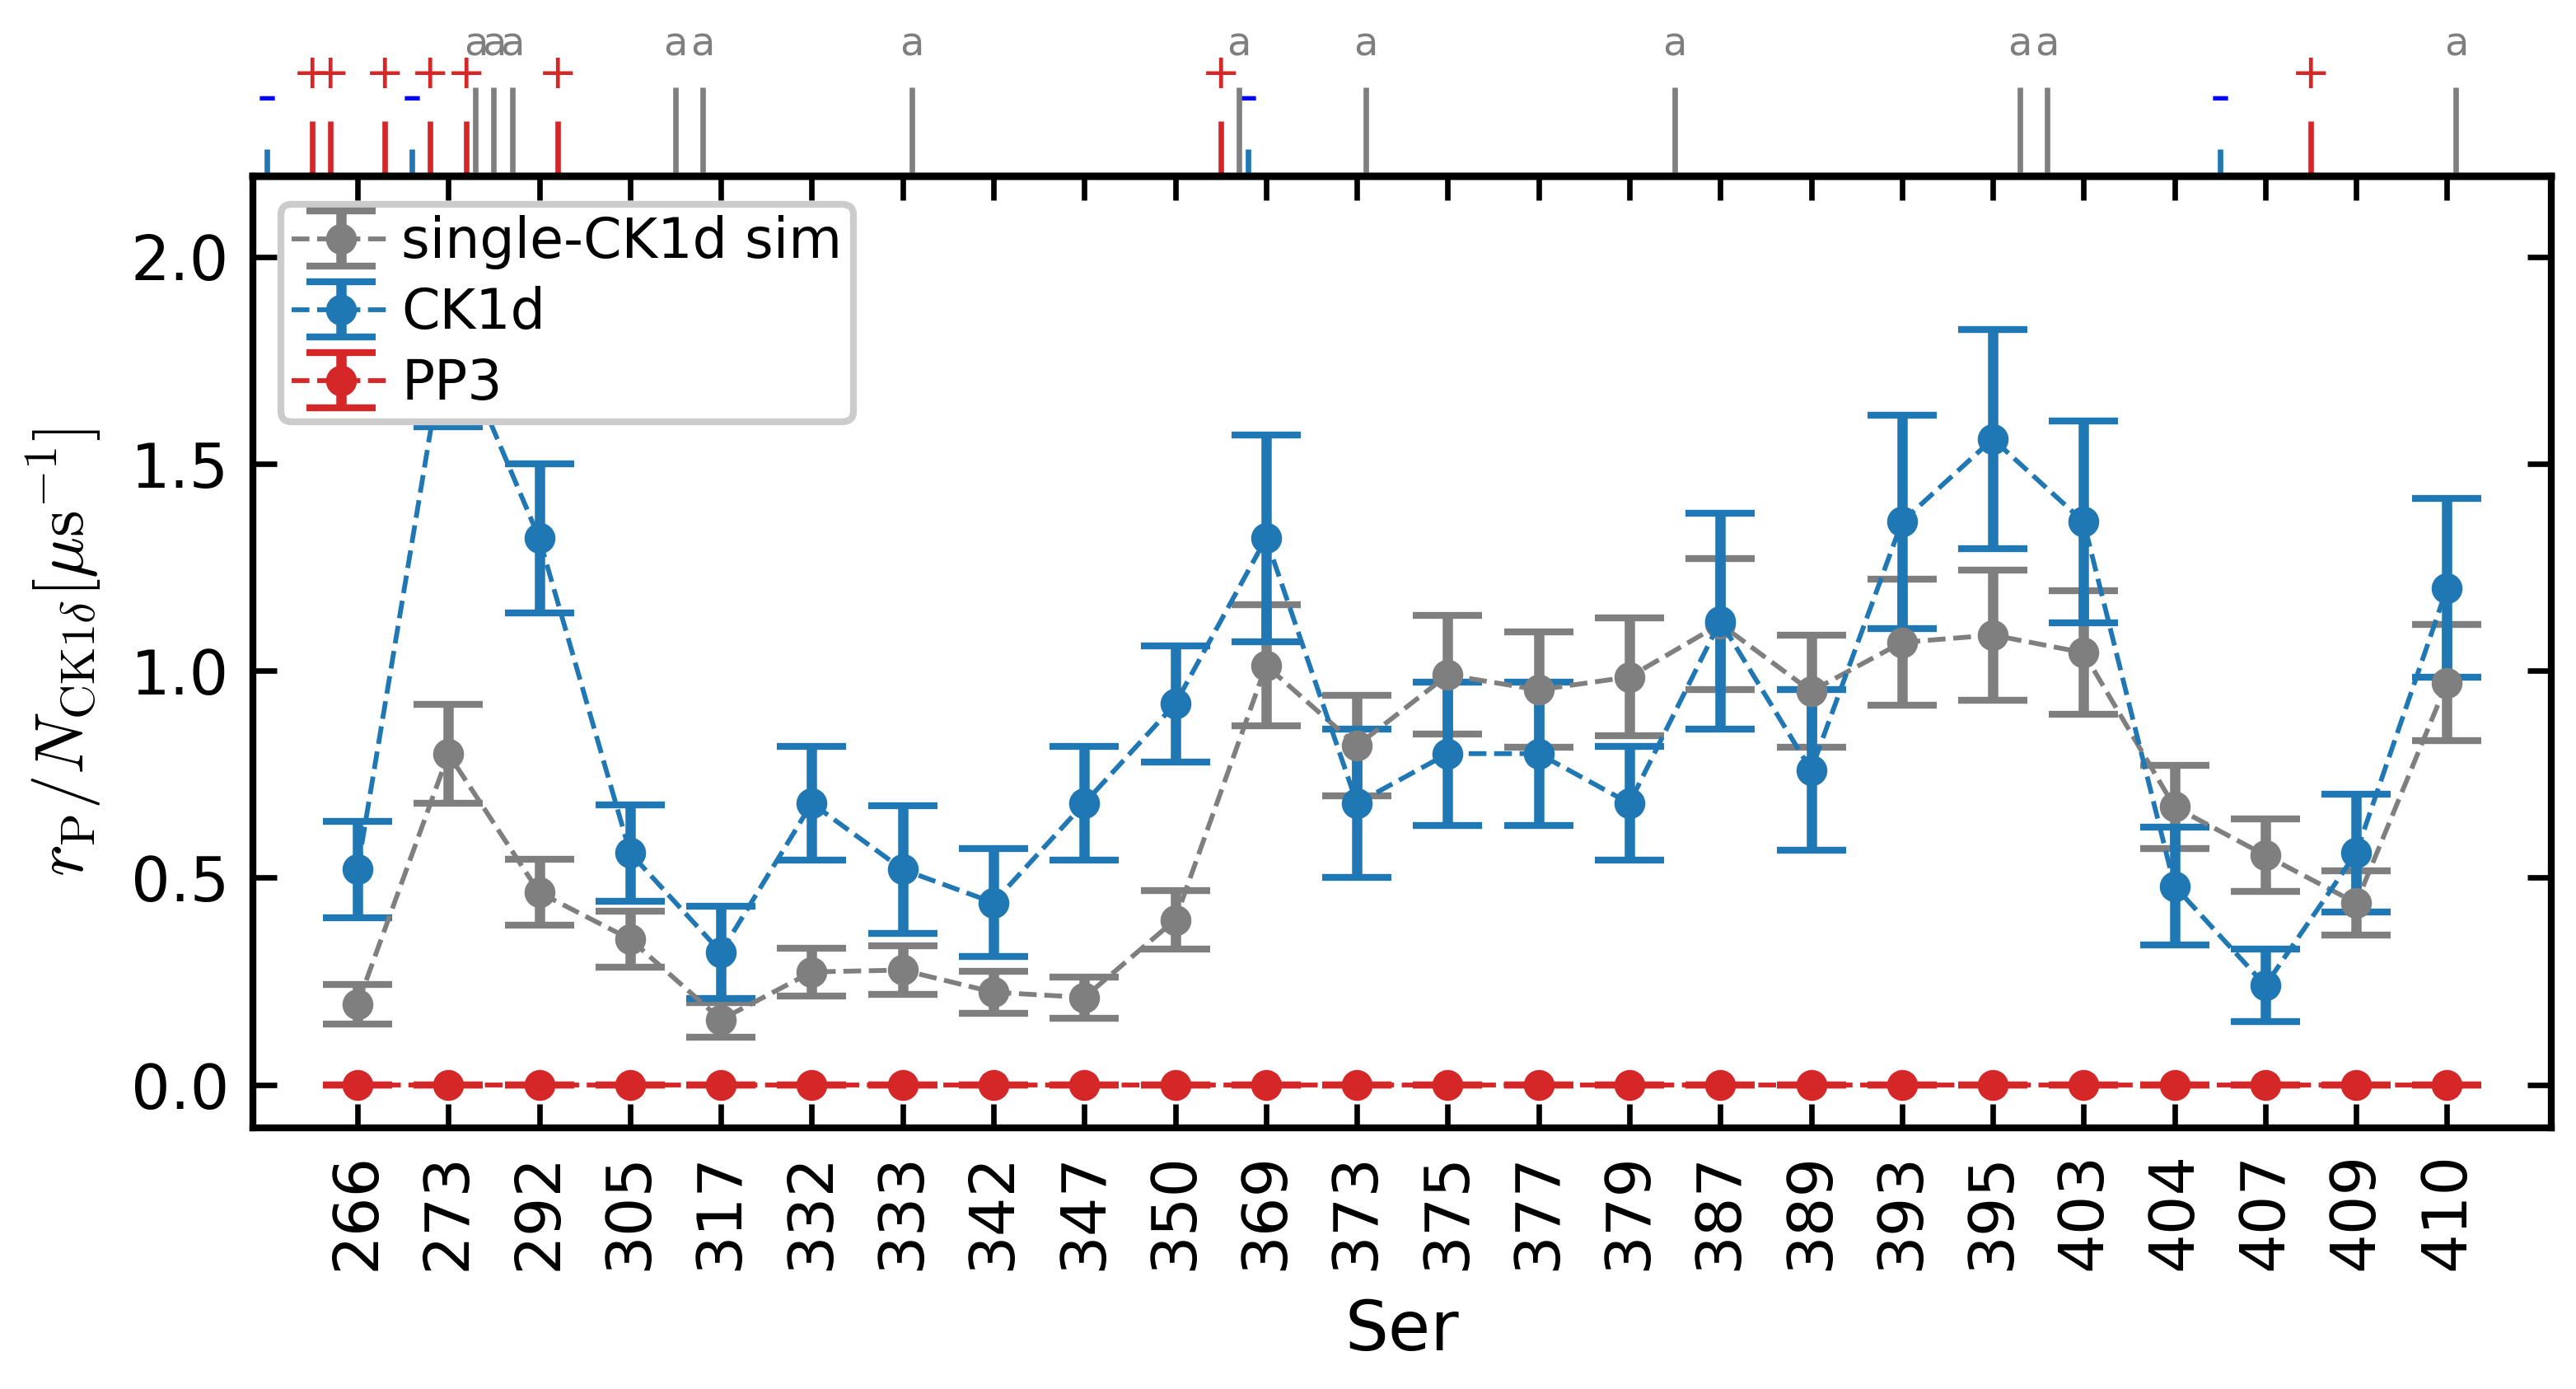

In [80]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rp, drp, fmt='.--', color='tab:grey', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"single-CK1d sim")
ax1.errorbar(np.arange(1,25), rp_k, drp_k, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d")
ax1.errorbar(np.arange(1,25), rp_p, drp_p, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

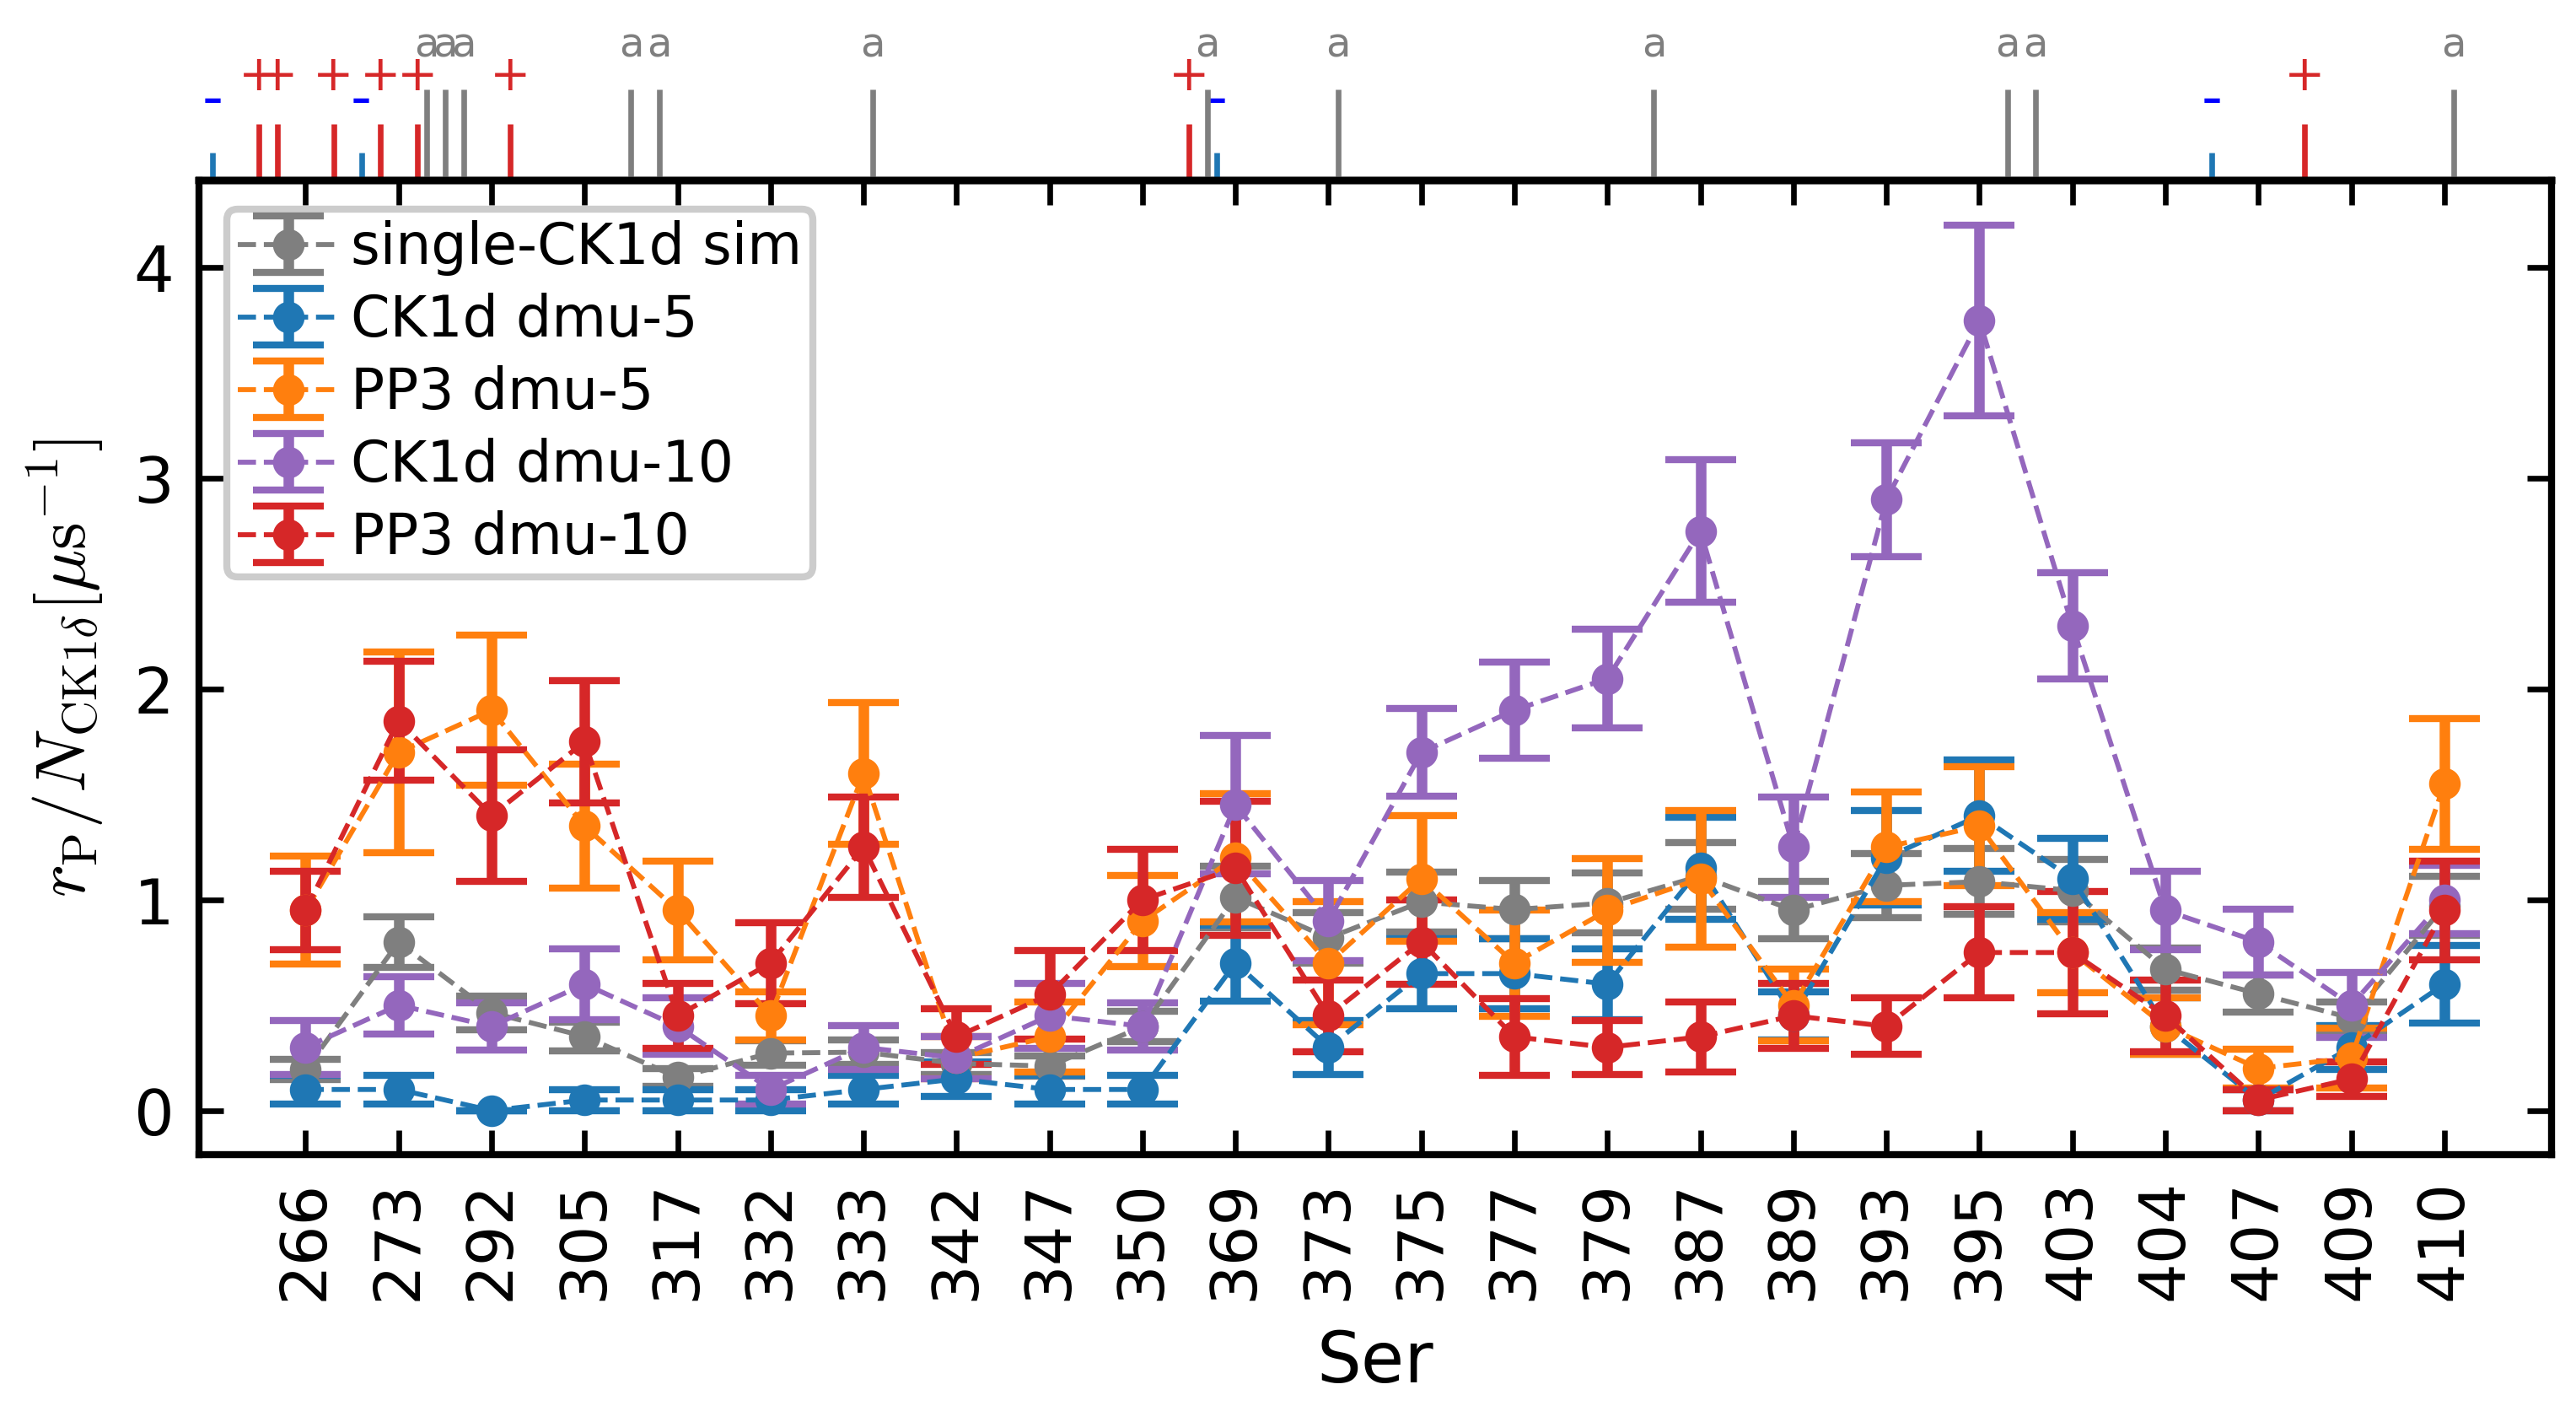

In [33]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rp, drp, fmt='.--', color='tab:grey', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"single-CK1d sim")
ax1.errorbar(np.arange(1,25), rp_k_dmu5, drp_k_dmu5, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d dmu-5")
ax1.errorbar(np.arange(1,25), rp_p_dmu5, drp_p_dmu5, fmt='.--', color='tab:orange', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3 dmu-5")
ax1.errorbar(np.arange(1,25), rp_k_dmu10, drp_k_dmu10, fmt='.--', color='tab:purple', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d dmu-10")
ax1.errorbar(np.arange(1,25), rp_p_dmu10, drp_p_dmu10, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3 dmu-10")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

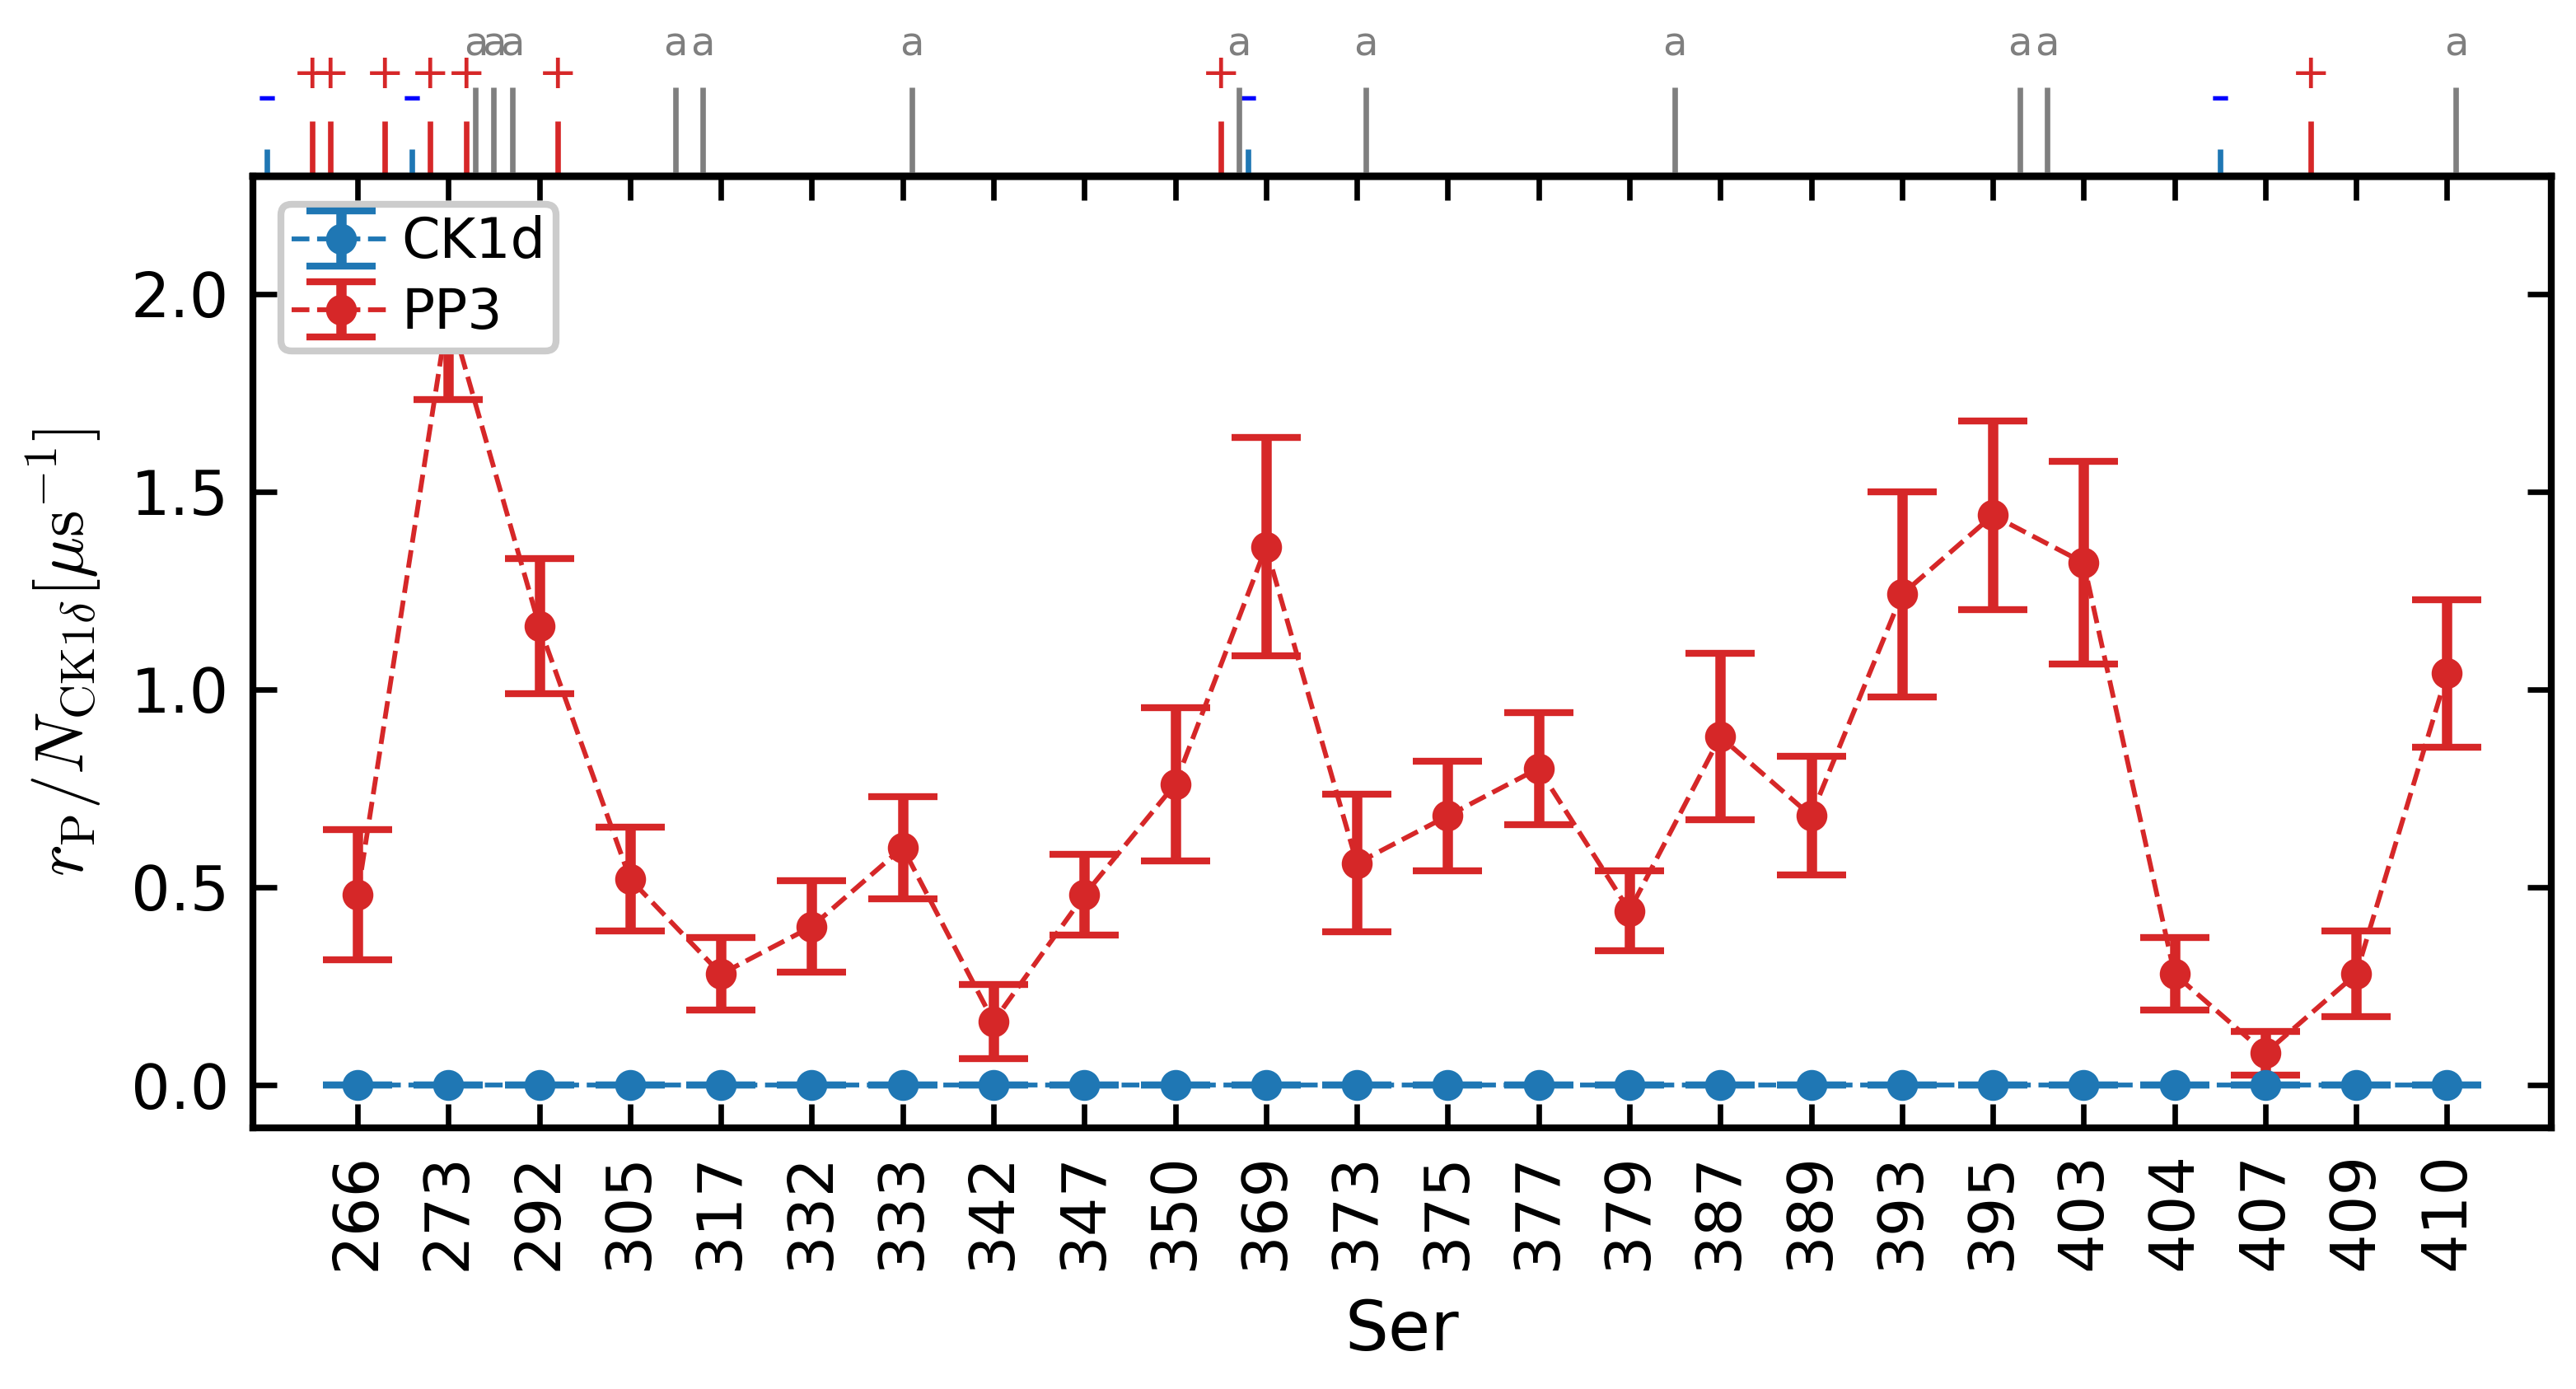

In [81]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rdp_k, drdp_k, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d")
ax1.errorbar(np.arange(1,25), rdp_p, drdp_p, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

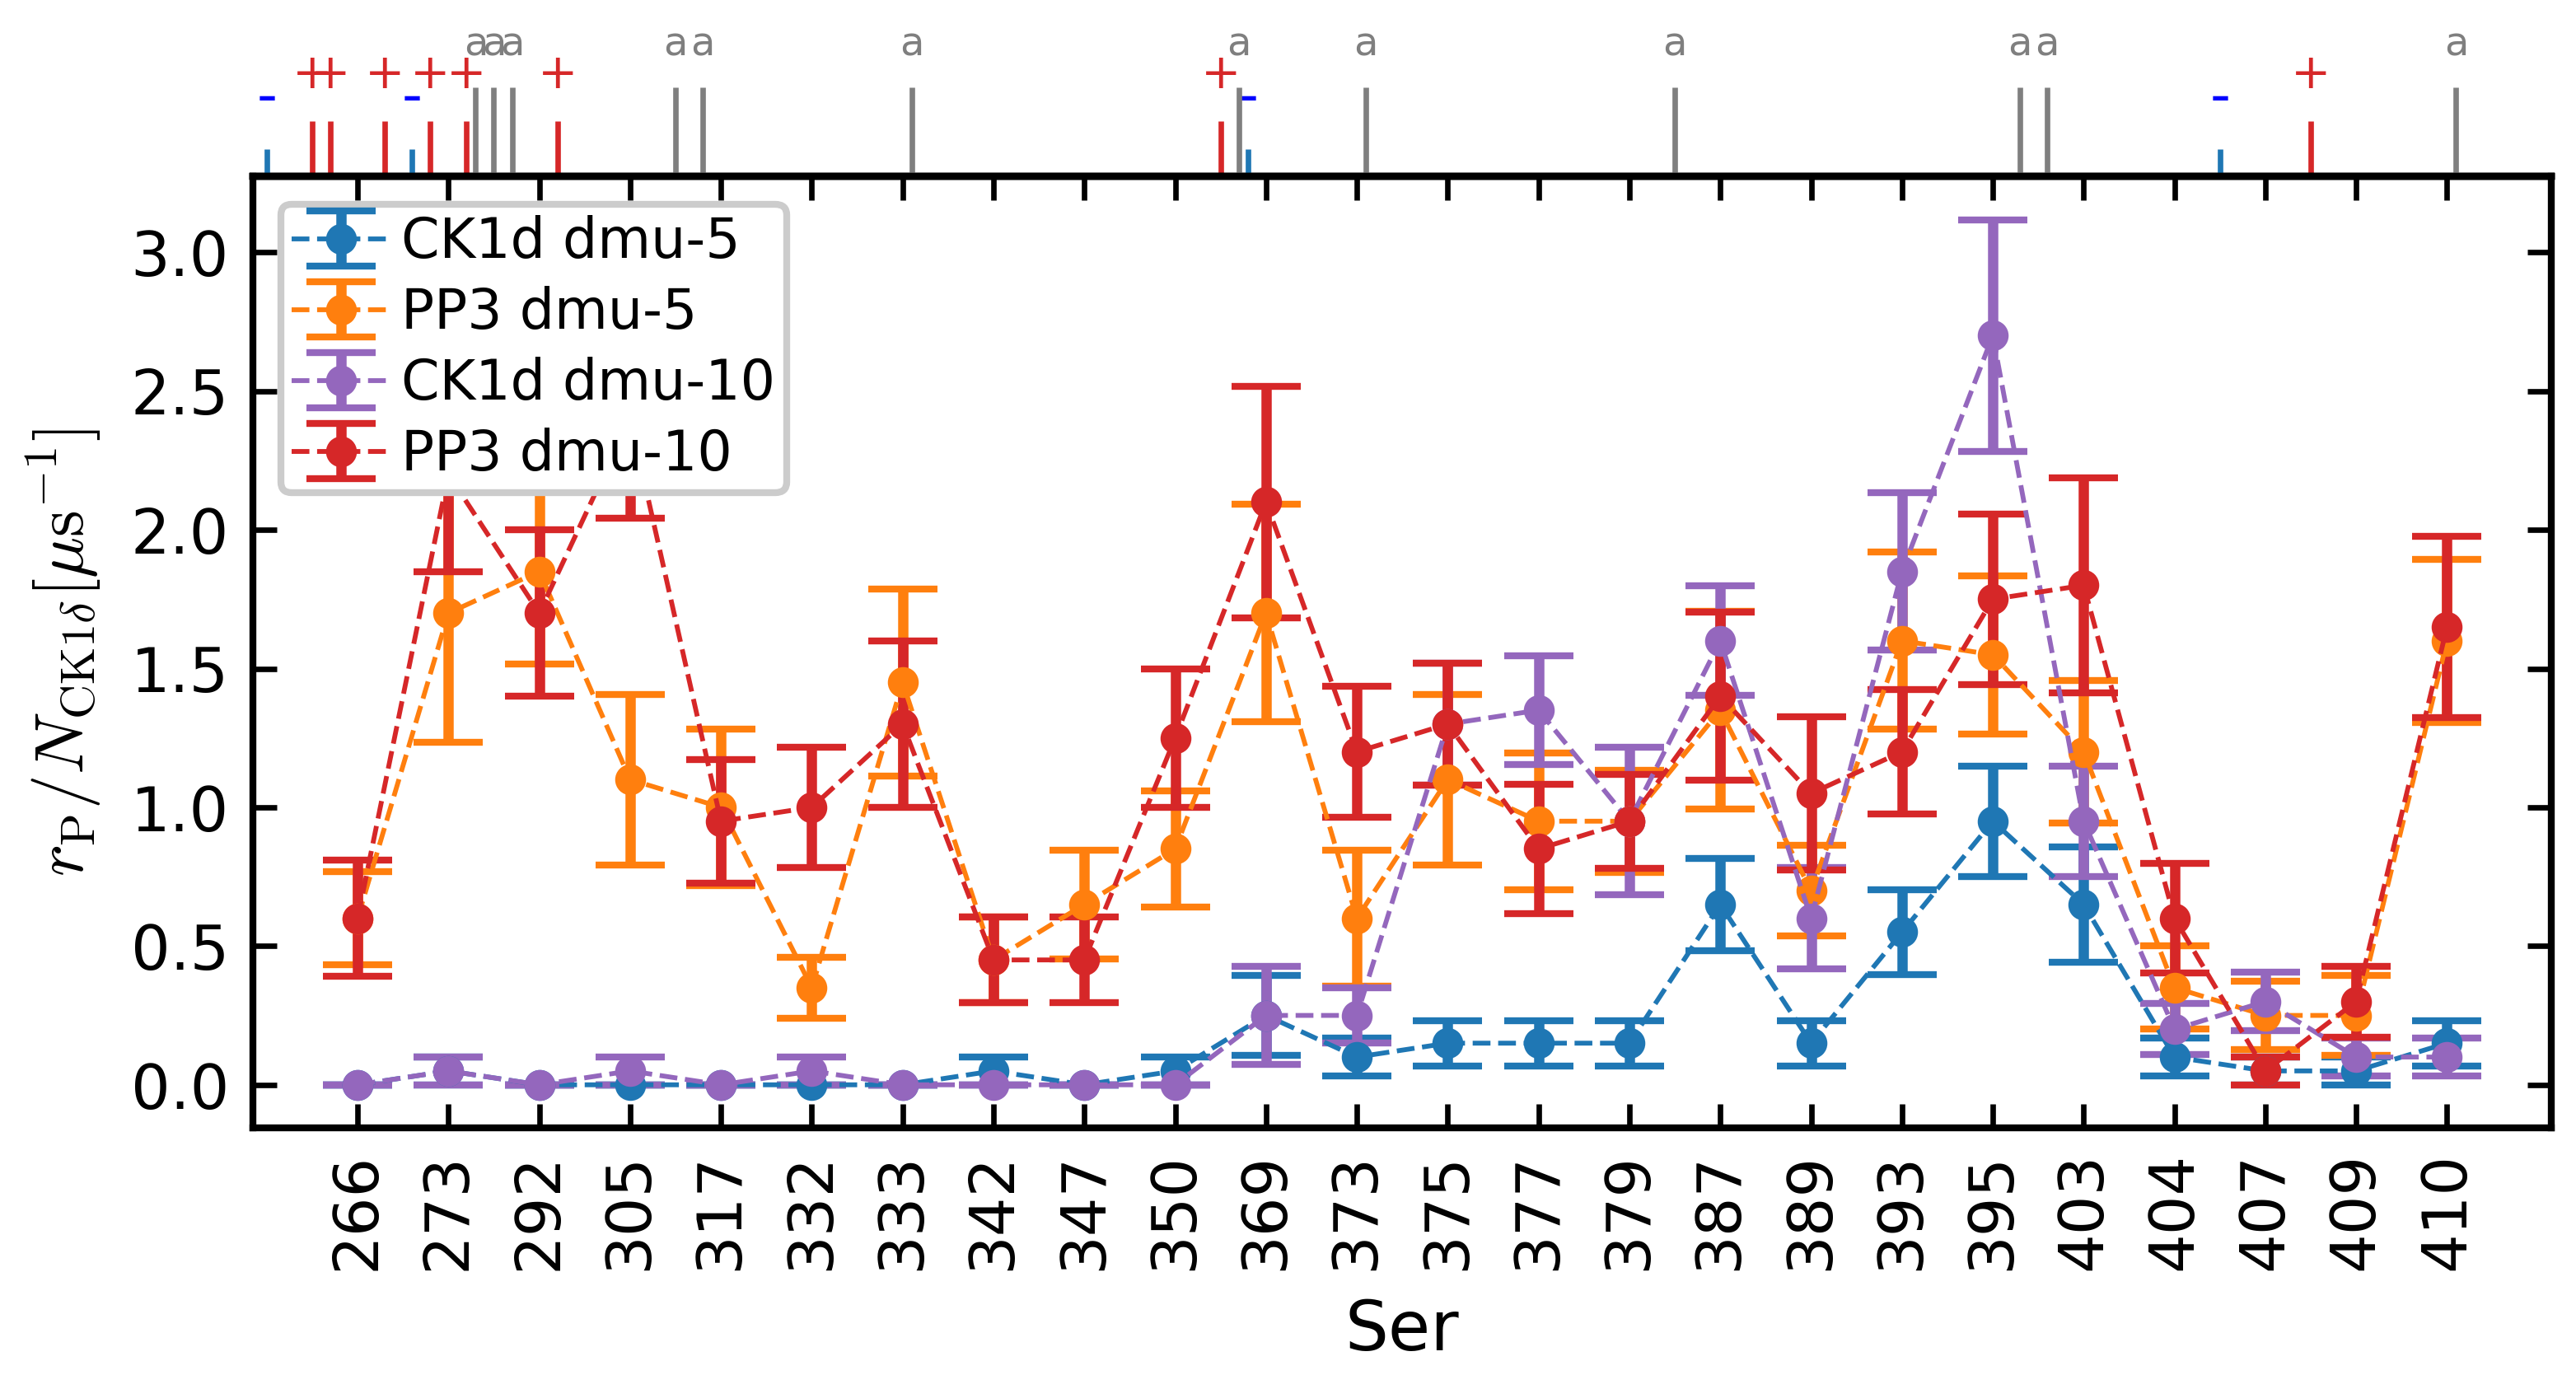

In [34]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rdp_k_dmu5, drdp_k_dmu5, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d dmu-5")
ax1.errorbar(np.arange(1,25), rdp_p_dmu5, drdp_p_dmu5, fmt='.--', color='tab:orange', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3 dmu-5")
ax1.errorbar(np.arange(1,25), rdp_k_dmu10, drdp_k_dmu10, fmt='.--', color='tab:purple', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d dmu-10")
ax1.errorbar(np.arange(1,25), rdp_p_dmu10, drdp_p_dmu10, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3 dmu-10")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

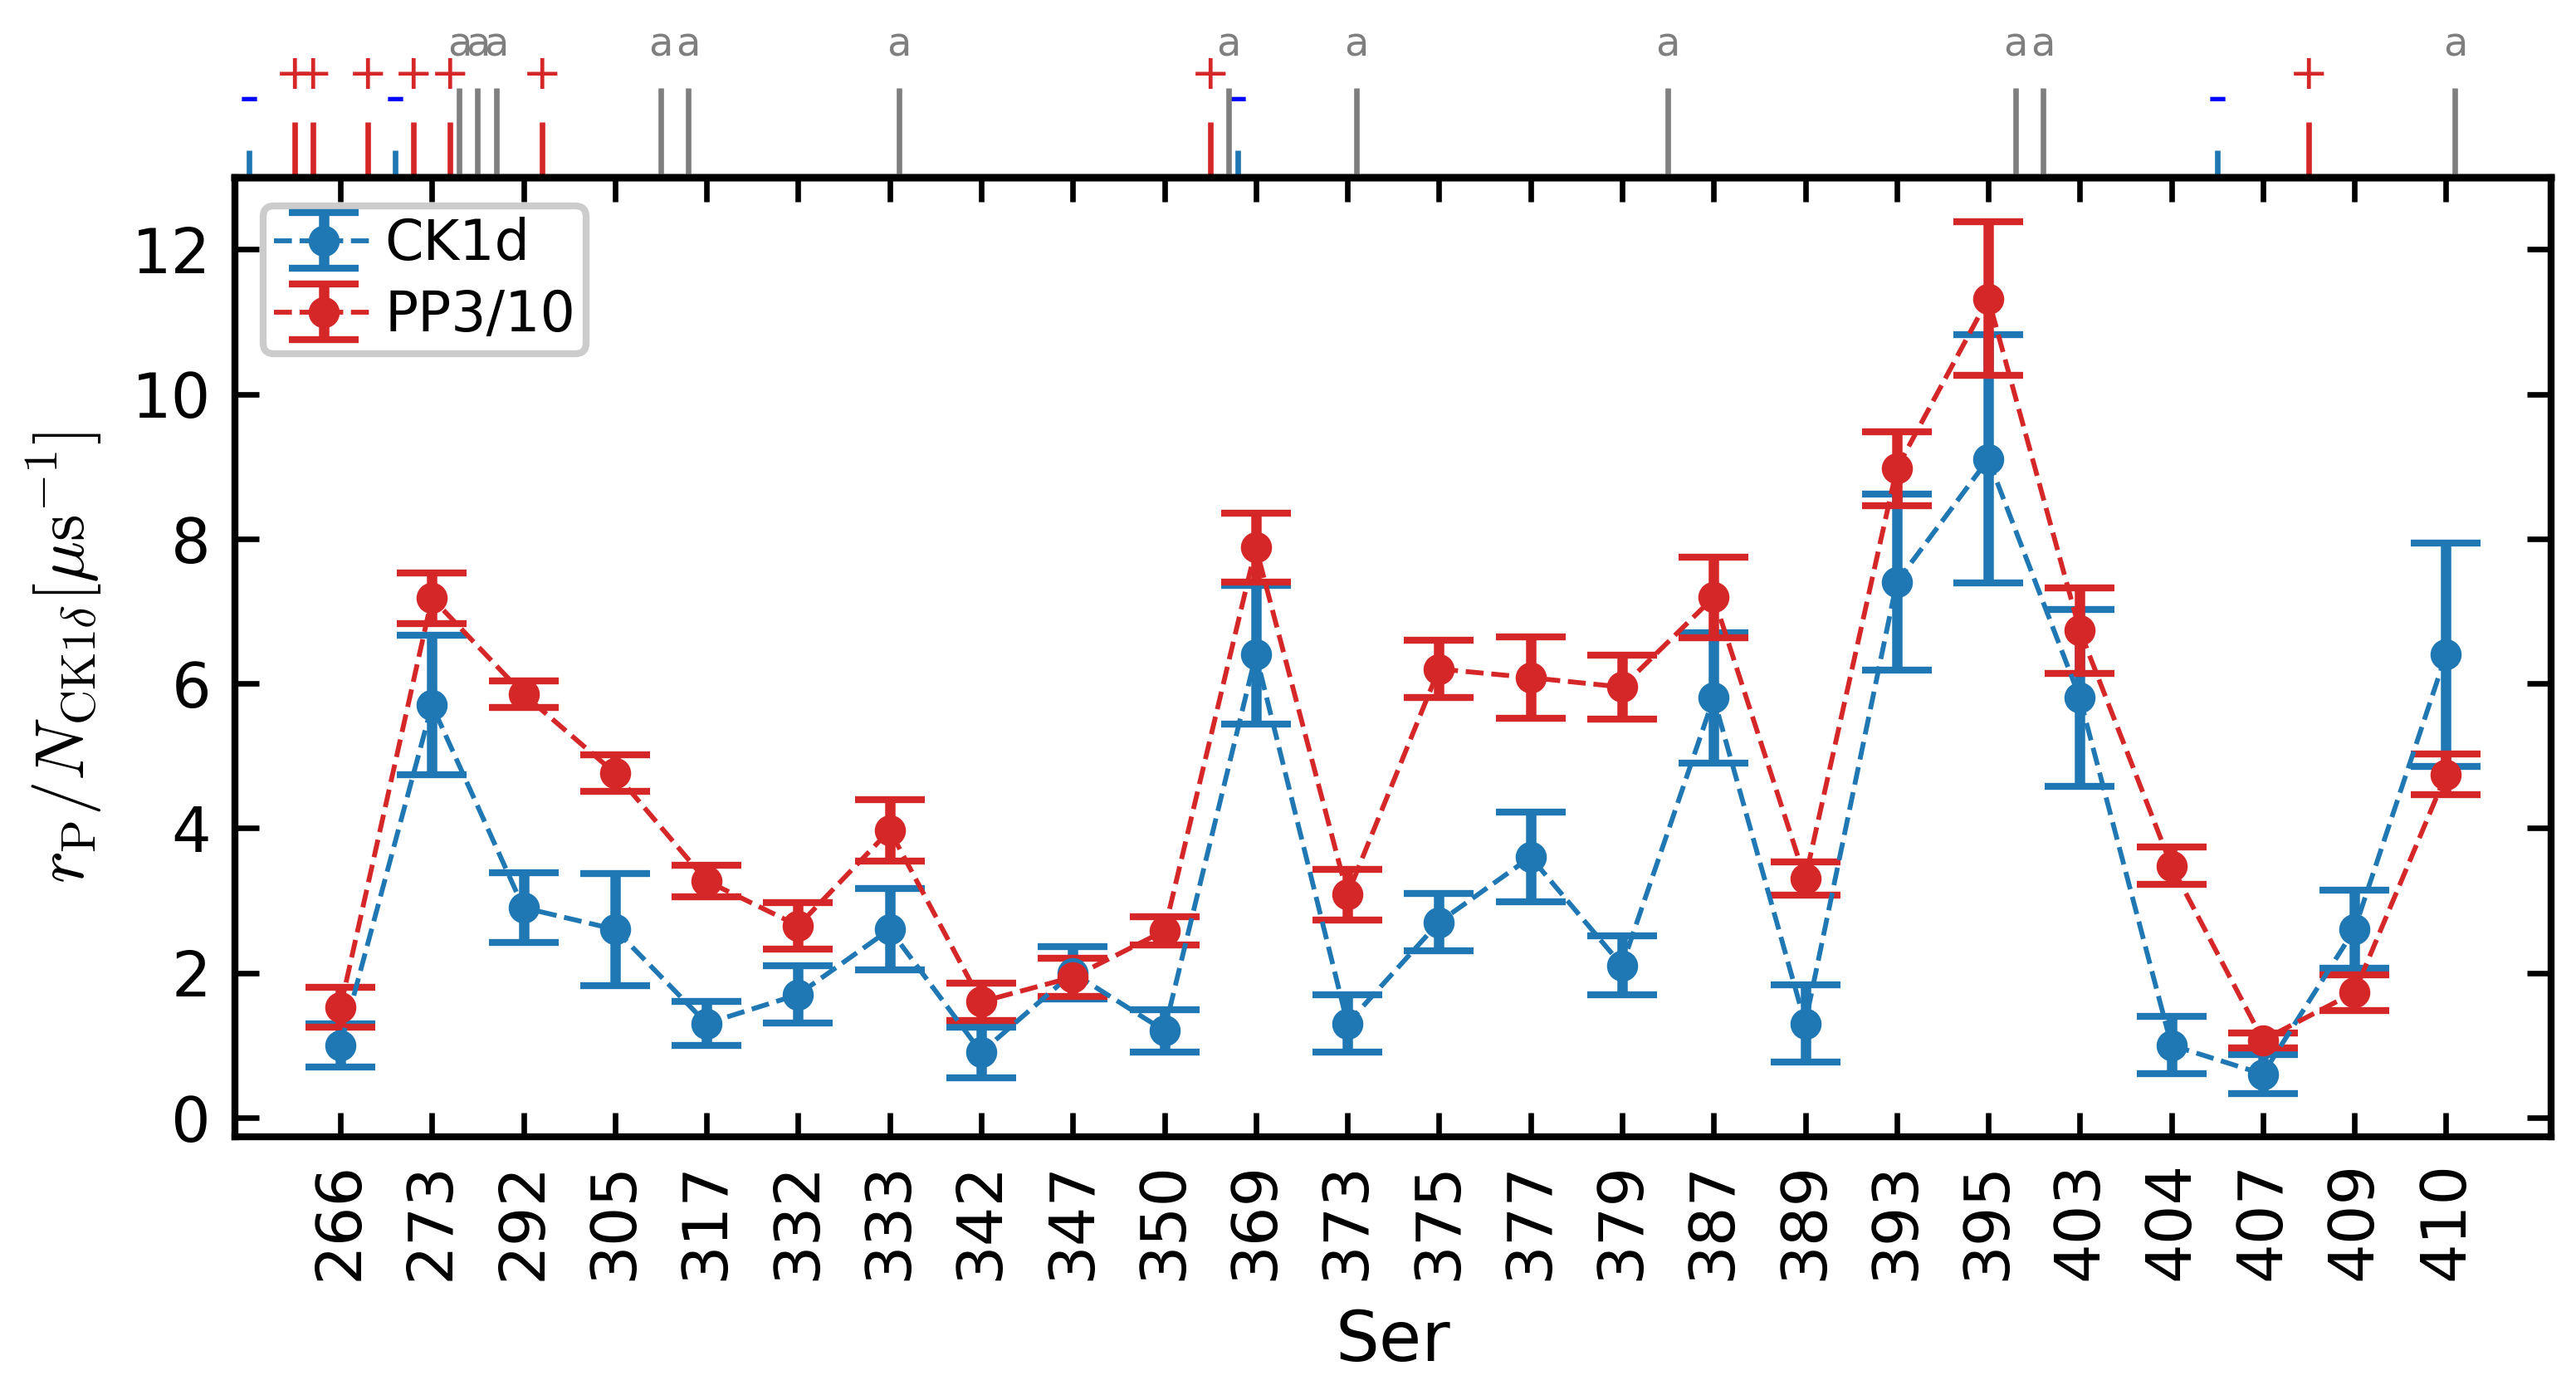

In [82]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rc_k, drc_k, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d")
ax1.errorbar(np.arange(1,25), rc_p/10, drc_p/10, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3/10")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

### Condensate 

In [32]:
pSer_cond, d_pSer_cond = pSer_per_chain(dirpath=path_200+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/', 
                                              file_suffix='200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_dump.gsd', 
                                              ser_l=ser_i, n_sims=5, times=times_cond, len_prot=154, n_prot=200)
pSer_cond_5us, d_pSer_cond_5us = pSer_per_chain(dirpath=path_200+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/', 
                                              file_suffix='200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_5us_dump.gsd', 
                                              ser_l=ser_i, n_sims=5, times=times_cond_5us, len_prot=154, n_prot=200)

100%|███████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1322.17it/s]


In [39]:
time_step_5us

array([5.00e+08, 5.04e+08, 5.08e+08, 5.12e+08, 5.16e+08, 5.20e+08,
       5.24e+08, 5.28e+08, 5.32e+08, 5.36e+08, 5.40e+08, 5.44e+08,
       5.48e+08, 5.52e+08, 5.56e+08, 5.60e+08, 5.64e+08, 5.68e+08,
       5.72e+08, 5.76e+08, 5.80e+08, 5.84e+08, 5.88e+08, 5.92e+08,
       5.96e+08, 6.00e+08, 6.04e+08, 6.08e+08, 6.12e+08, 6.16e+08,
       6.20e+08, 6.24e+08, 6.28e+08, 6.32e+08, 6.36e+08, 6.40e+08,
       6.44e+08, 6.48e+08, 6.52e+08, 6.56e+08, 6.60e+08, 6.64e+08,
       6.68e+08, 6.72e+08, 6.76e+08, 6.80e+08, 6.84e+08, 6.88e+08,
       6.92e+08, 6.96e+08])

Text(0, 0.5, 'N_pSer per chain')

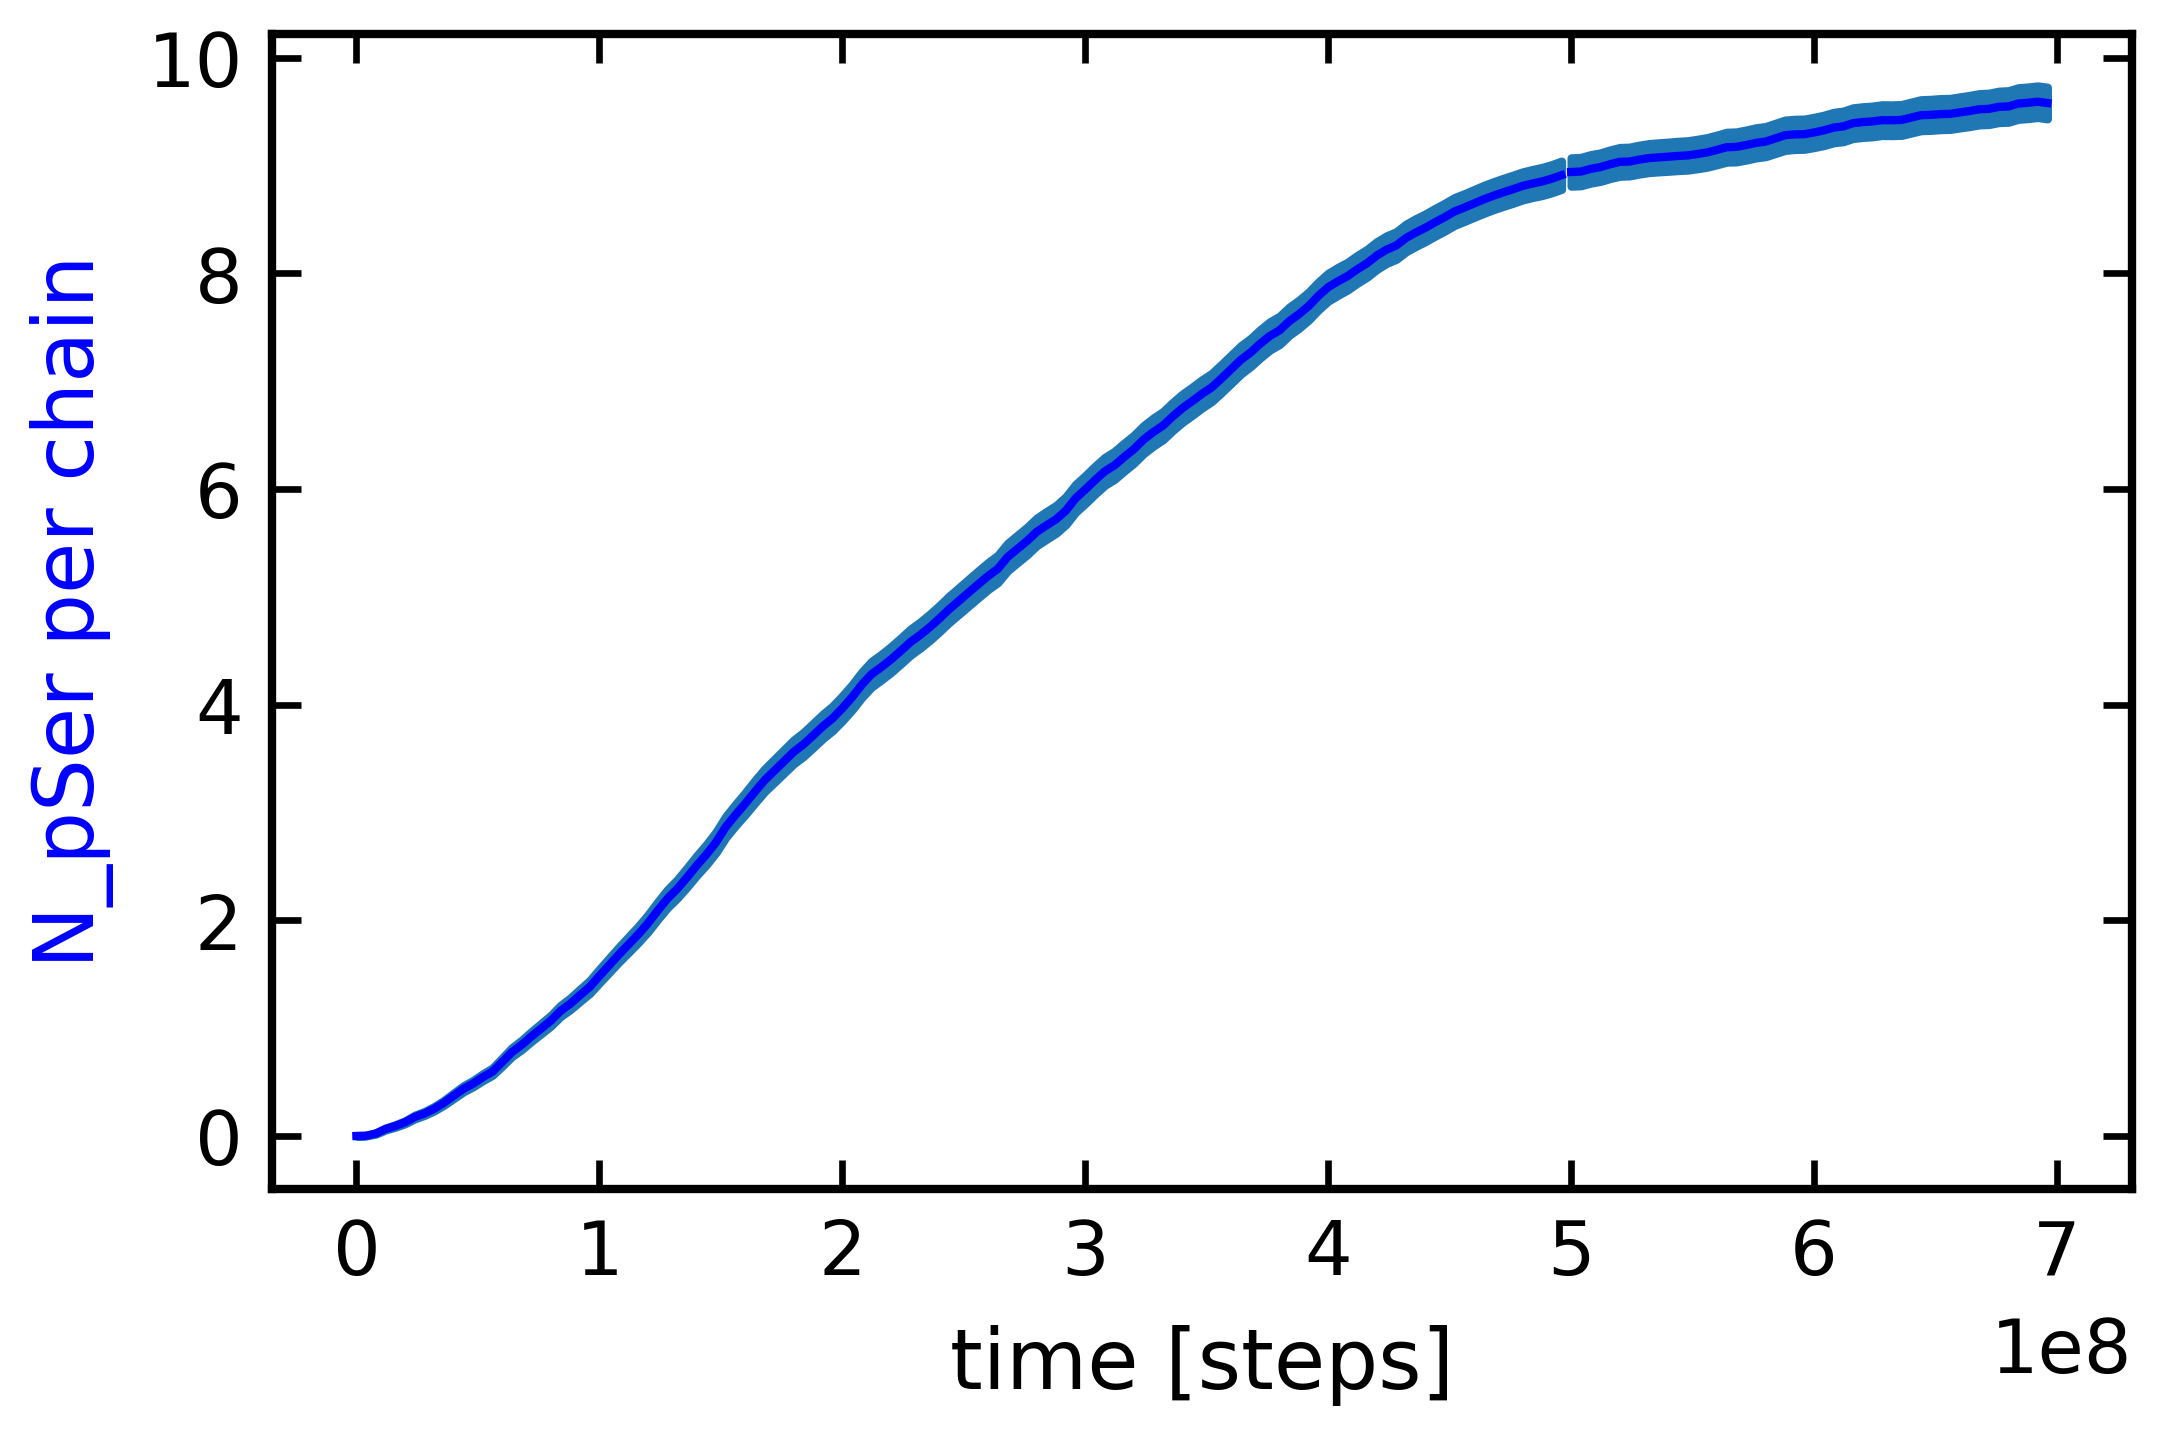

In [38]:
time_step = times_cond*200000
time_step_5us = times_cond_5us*200000 + 5*1e8

fig, ax1 = plt.subplots(figsize=(4, 2.5))

# Plot the first array with the primary y-axis
ax1.plot(time_step, pSer_cond, 'b')
ax1.fill_between(time_step, pSer_cond-d_pSer_cond, pSer_cond+d_pSer_cond, color='tab:blue')
ax1.plot(time_step_5us, pSer_cond_5us, 'b')
ax1.fill_between(time_step_5us, pSer_cond_5us-d_pSer_cond_5us, pSer_cond_5us+d_pSer_cond_5us, color='tab:blue')
ax1.set_xlabel('time [steps]')
ax1.set_ylabel('N_pSer per chain', color='b')

#ax1.legend(ncols=3, loc='lower right')

In [67]:
rp_cond, drp_cond = hpar.count_contacts(dirpath=path_200+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/',  
                                              file_suffix='200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_contacts.txt', 
                                              ser_l=ser_i, n_sims=1, type_of_contact=1, len_prot=154, n_prot=200, max_dist=1.05, start=300000000)

rdp_cond, drdp_cond = hpar.count_contacts(dirpath=path_200+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/',  
                                              file_suffix='200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_contacts.txt', 
                                              ser_l=ser_i, n_sims=1, type_of_contact=-1, len_prot=154, n_prot=200, max_dist=1.05, start=300000000)


/localscratch/zippoema/git/HPA/src/hpa/rates.py:184: RuntimeWarning: invalid value encountered in divide
  count_err = np.std(counts, axis=0)/np.sqrt(len(sims_list)-1)


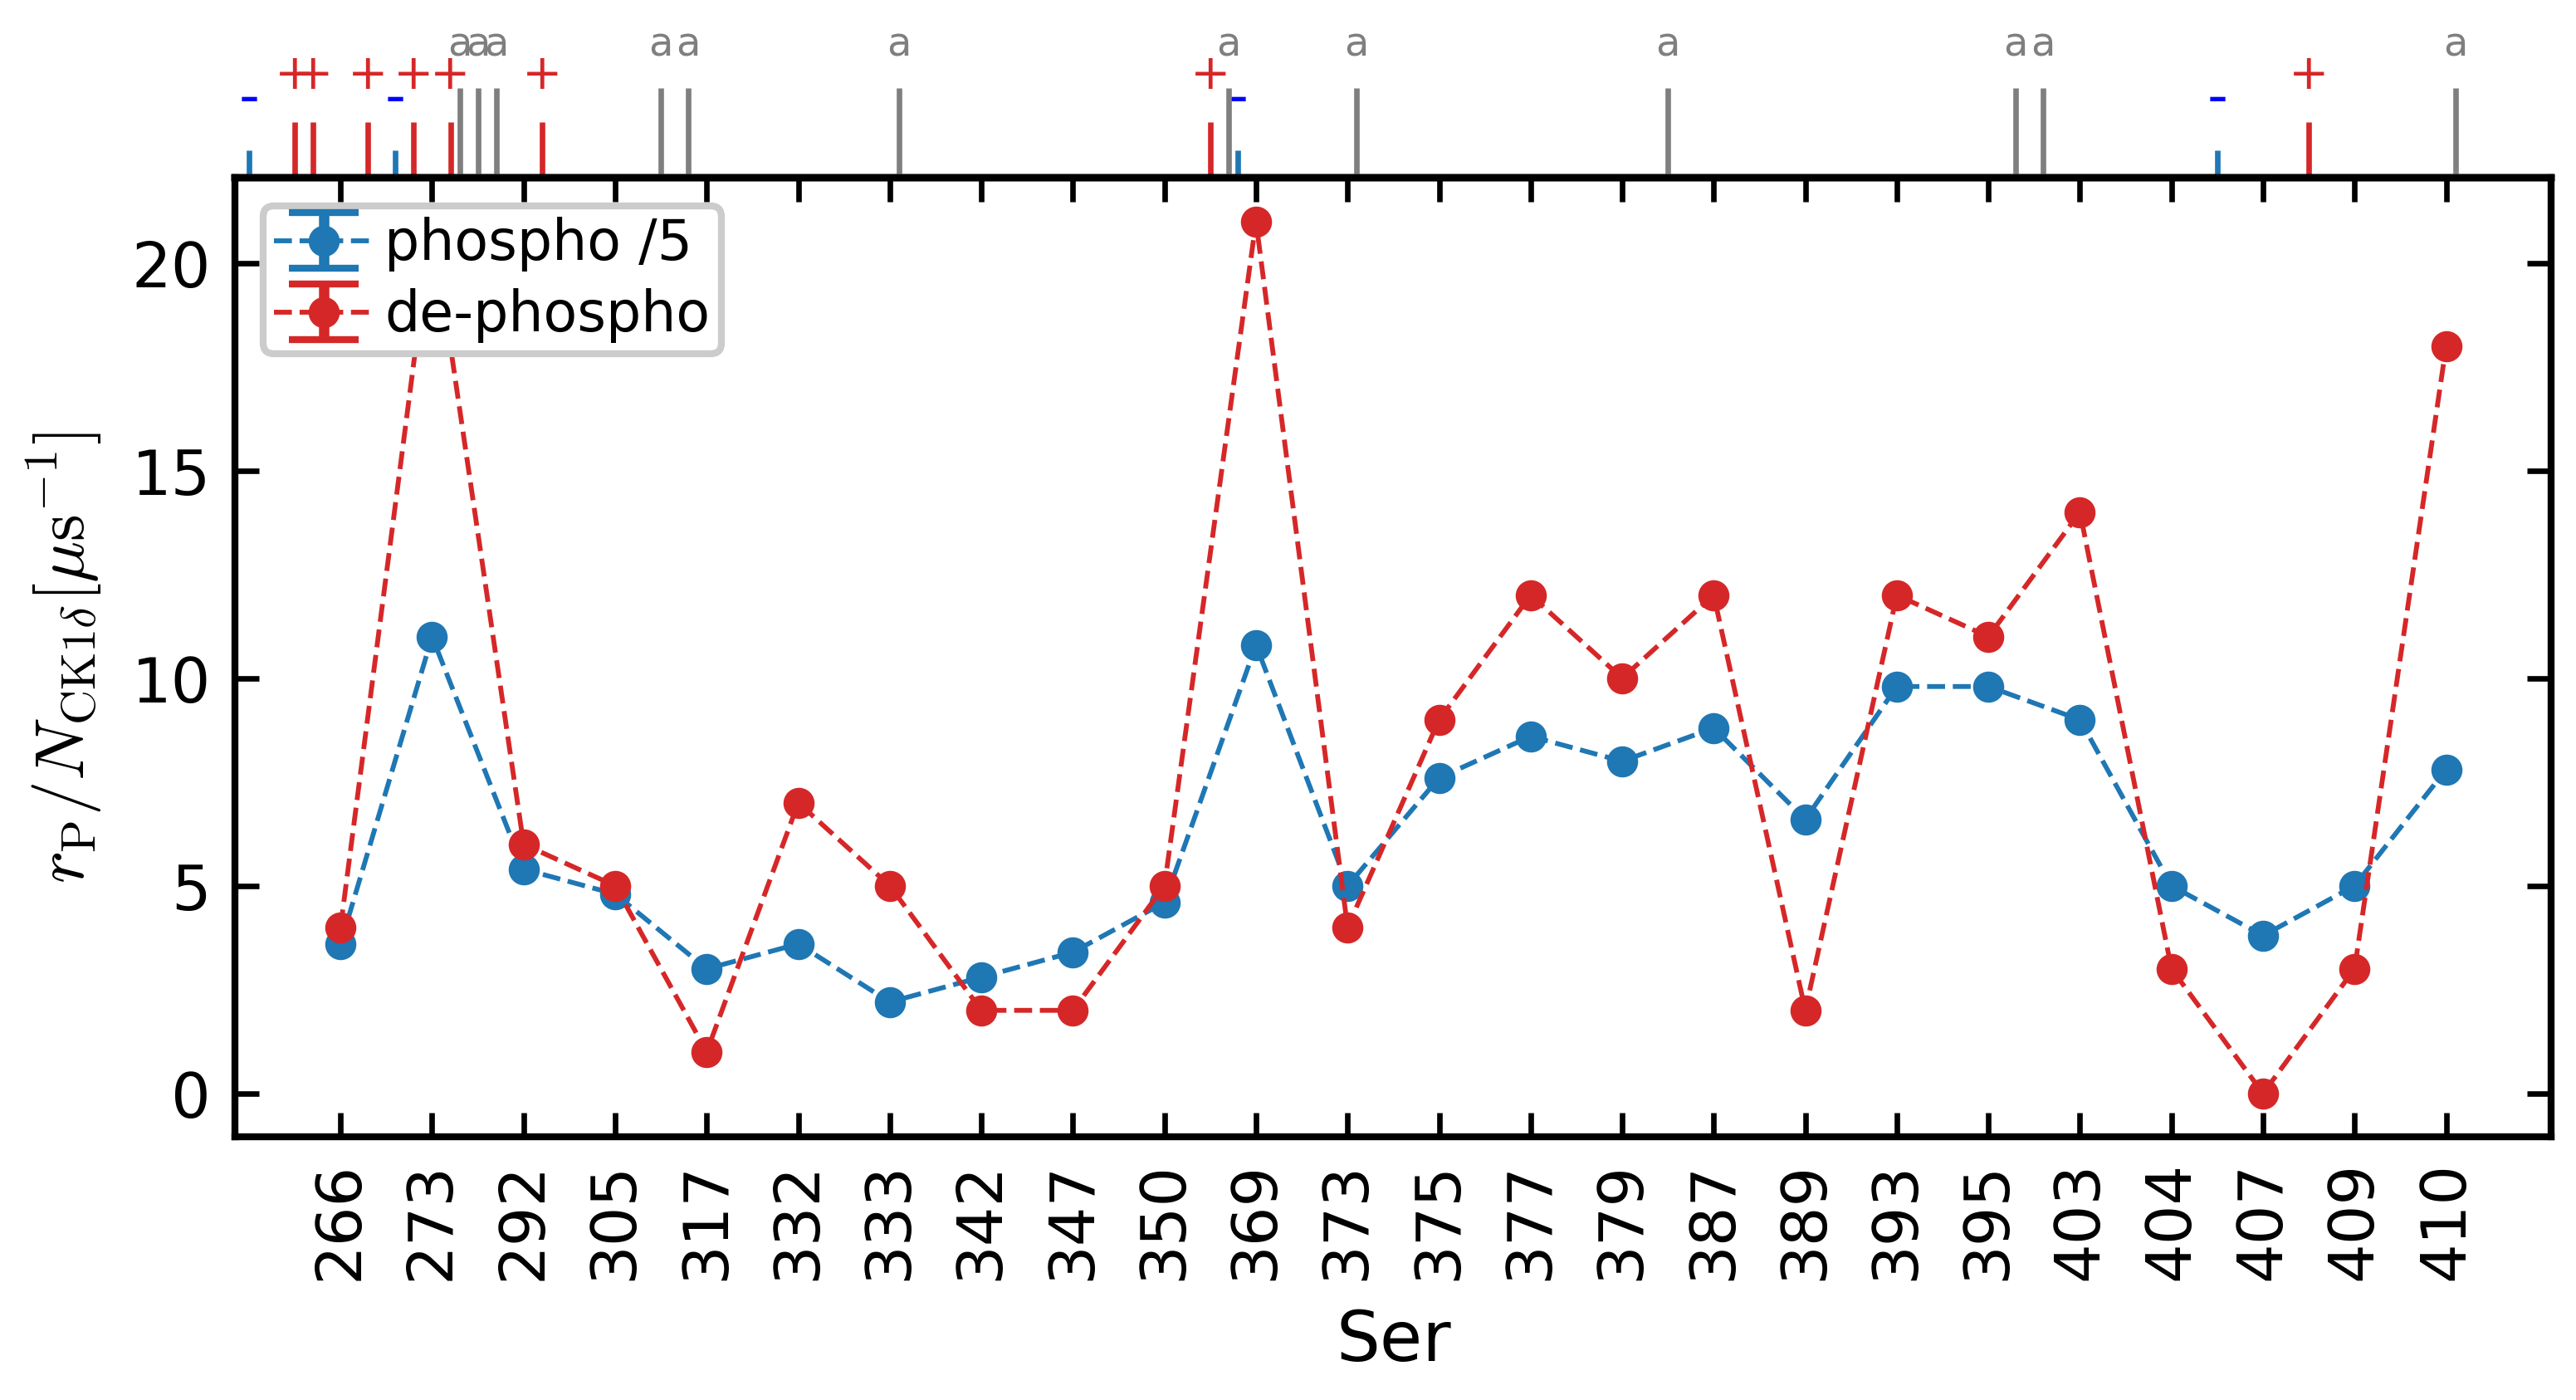

In [68]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rp_cond/5, drp_cond, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"phospho /5")
ax1.errorbar(np.arange(1,25), rdp_cond, drdp_cond, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"de-phospho")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()